### I will only use NAIS data
https://ar.copernicus.org/articles/1/81/2023/

In [2]:
from nais.utils import remove_bad_data
import xarray as xr

ds = xr.open_dataset("nais1_dataset.nc")
bad_data = xr.open_dataset("bad_data_bounds.nc")
ds = remove_bad_data(ds, bad_data)


In [3]:

nais_neg_particles = ds['neg_particles']

In [4]:
nais_neg_particles = nais_neg_particles.to_dataframe(name='particles').reset_index()


In [5]:
nais_neg_particles

,time,diameter,particles
0,2024-05-16,8.028800e-10,NaN
1,2024-05-16,8.628290e-10,NaN
2,2024-05-16,9.272542e-10,NaN
3,2024-05-16,9.961534e-10,NaN
4,2024-05-16,1.070172e-09,NaN
...,...,...,...
344570,2025-02-01,3.063141e-08,7021.142361
344571,2025-02-01,3.302483e-08,8238.382800
344572,2025-02-01,3.560527e-08,9144.778473
344573,2025-02-01,3.846420e-08,9550.680676


In [6]:
# Unstack the particles dimension to get a DataFrame with the diameter as columns
nais_neg_particles = nais_neg_particles.pivot(index='time', columns='diameter', values='particles')
nais_neg_particles

diameter,8.028800e-10,8.628290e-10,9.272542e-10,9.961534e-10,1.070172e-09,1.151195e-09,1.238353e-09,1.330049e-09,1.428535e-09,1.535309e-09,...,2.107146e-08,2.268812e-08,2.445574e-08,2.636108e-08,2.841614e-08,3.063141e-08,3.302483e-08,3.560527e-08,3.846420e-08,4.155270e-08
time,,,,,,,,,,,,,,,,,,,,,
2024-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-16 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-16 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-16 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-16 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7111.716271,7063.175414,7538.080976,8105.891840,9335.216368,10340.677370,11045.137168,12222.105903,13158.525265,12911.941554
2025-01-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7931.142843,8652.730892,9295.240089,10165.089125,10611.293013,11722.040817,13899.046401,14942.069770,15789.330660,16452.033834
2025-01-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8423.291308,9290.343052,10278.636401,11920.660170,13652.256835,15574.435920,16891.553881,17754.622760,17242.439849,16103.098674


In [7]:
# Calculate N2.5-5nm
import aerosol.functions as af

N_2_5_5 = af.calc_conc_interp(nais_neg_particles, 2.5e-9, 5e-9)

In [8]:
import pandas as pd
import numpy as np

def calc_bin_edges(dp):
    """
    Calculate bin edges given bin centers
    
    Parameters
    ----------
    
    dp : pandas series of lenght n
        bin center diameters

    Returns
    -------

    pandas series of lenght n+1
        log bin edges

    """
    dp_arr = dp.values
    logdp_mid = np.log10(dp_arr)
    logdp = (logdp_mid[:-1]+logdp_mid[1:])/2.0
    maxval = [logdp_mid.max()+(logdp_mid.max()-logdp.max())]
    minval = [logdp_mid.min()-(logdp.min()-logdp_mid.min())]
    logdp = np.concatenate((minval,logdp,maxval))
    
    return pd.Series(logdp)

def calc_conc_interp(df,dmin,dmax):
    """
    Calculate particle number concentration from aerosol
    number-size distribution by interpolating between bins 

    Parameters
    ----------

    df : dataframe
        Aerosol number-size distribution
    dmin : float or series of length n
        Size range lower diameter(s), unit: m
    dmax : float or series of length n
        Size range upper diameter(s), unit: m

    Returns
    -------

    dataframe
        Number concentration in the given size range(s), unit: cm-3

    """

    dmin = pd.Series(dmin)
    dmax = pd.Series(dmax)

    dp = df.columns.values.astype(float)

    # Create dense diameter grid
    dp_grid = np.logspace(np.log10(dp).min(),np.log10(dp).max(),1000)

    # Interpolate to dense diameter grid
    df_interp = df.reindex(
        dp_grid,
        axis=1,
        method="nearest",
        tolerance=dp_grid[1]-dp_grid[0]).interpolate(
            axis=1,
            limit_area="inside",
            method="linear").dropna(
                axis=1,
                how="all")

    # Update the diameter grid
    dp_grid = df_interp.columns.values.astype(float)

    # Calculate bin widths in log scale 
    dlogdp_grid = np.diff(calc_bin_edges(pd.Series(dp_grid)))

    # Transform dN/dlogDp -> dN
    dn_interp = df_interp * dlogdp_grid

    conc_df = pd.DataFrame(index = df.index, columns = np.arange(len(dmin)))

    for i in range(len(dmin)):
        dp1 = np.max([dp_grid.min(), dmin.values[i]])
        dp2 = np.min([dp_grid.max(), dmax.values[i]])
        findex = np.argwhere((dp_grid<dp2)&(dp_grid>=dp1)).flatten()
        conc = dn_interp.iloc[:,findex].sum(axis=1,min_count=1)
        conc_df.iloc[:,i] = conc

    return conc_df

In [9]:
N_2_5_5 = calc_conc_interp(nais_neg_particles, 2.5e-9, 5e-9)

In [10]:
N_2_5_5[N_2_5_5 < 0] = np.nan    # Set negative values to NaN

In [11]:
N_2_5_5.rename(columns={0: 'concentration'}, inplace=True)

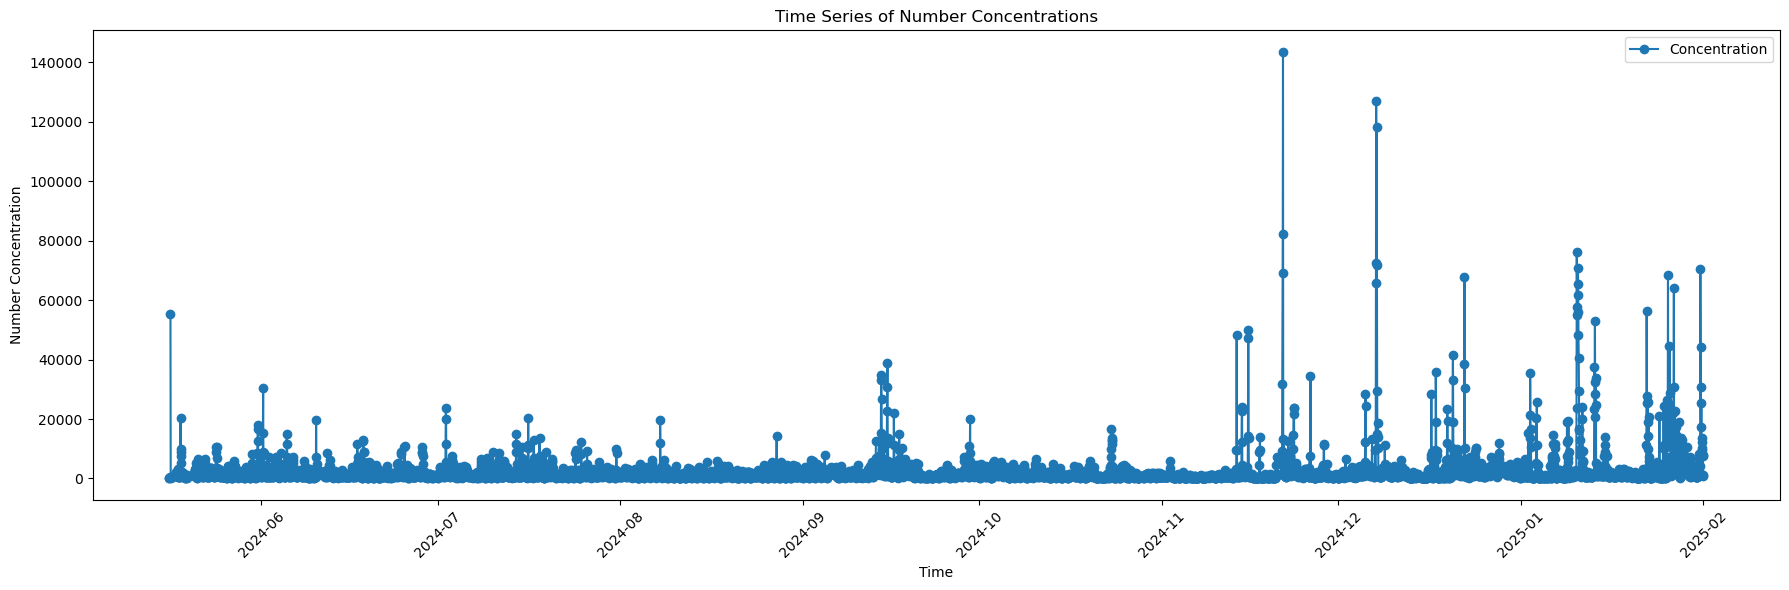

In [12]:
import matplotlib.pyplot as plt

# Create a figure with a specific size (optional)
plt.figure(figsize=(18, 6))

# Plot the data
plt.plot(N_2_5_5.index, N_2_5_5['concentration'], marker='o', linestyle='-', label='Concentration')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number Concentration')
plt.title('Time Series of Number Concentrations')
plt.legend()

# Improve formatting for the x-axis (rotating date labels)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [13]:
# Apply a rolling median over a 2-hour interval
# This uses the datetime index for a time-based rolling window.
N_2_5_5['smoothed'] = N_2_5_5.rolling('2h').median()

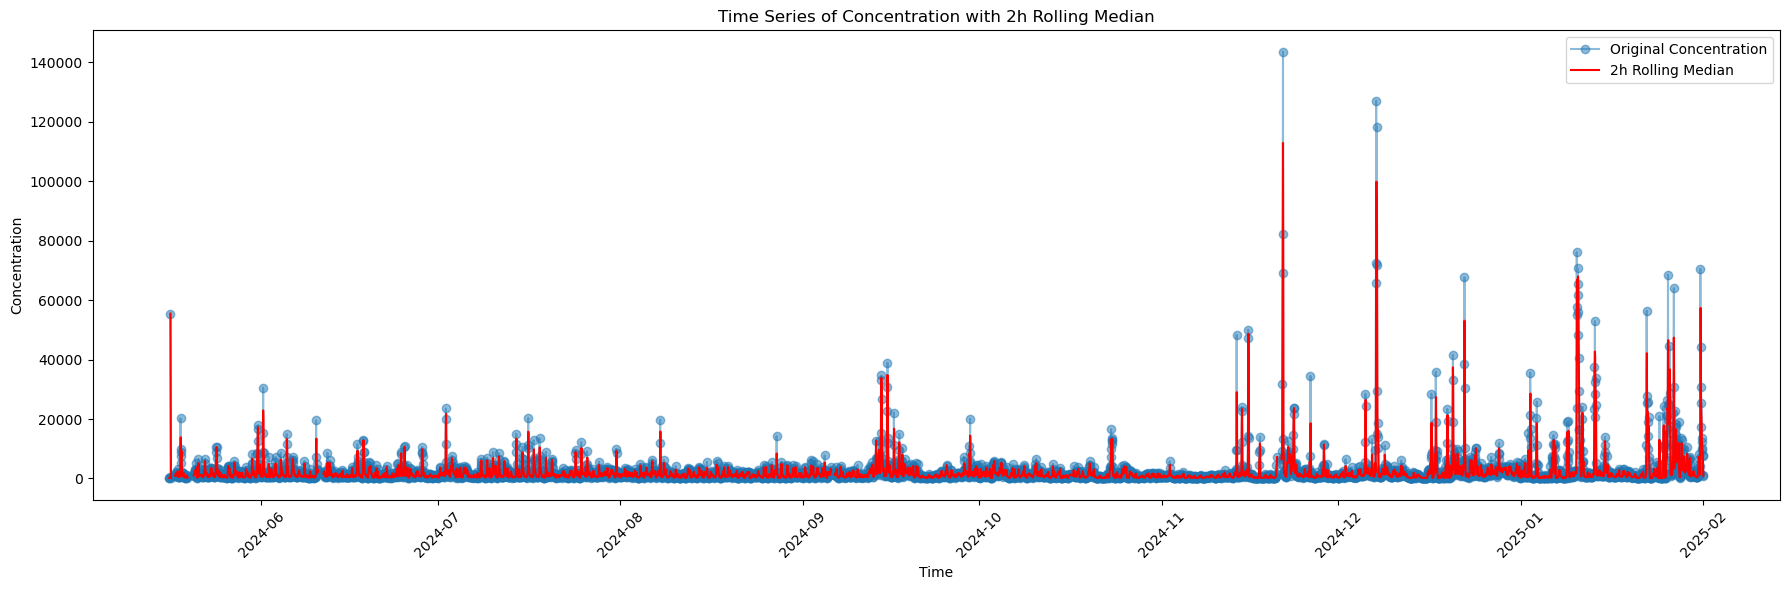

In [14]:
plt.figure(figsize=(18, 6))

# Plot the original concentration data
plt.plot(N_2_5_5.index, N_2_5_5['concentration'], marker='o', linestyle='-', 
         label='Original Concentration', alpha=0.5)

# Plot the smoothed data using a rolling median over a 2h window
plt.plot(N_2_5_5.index, N_2_5_5['smoothed'], linestyle='-', color='red', 
         label='2h Rolling Median')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Time Series of Concentration with 2h Rolling Median')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Identified diurnal extremes per season (using original concentration values):
Season: Fall
  Background (min median concentration) around hour 1: hours [0, 1, 2]
  Active (max median concentration) around hour 16: hours [15, 16, 17]

Season: Spring
  Background (min median concentration) around hour 2: hours [1, 2, 3]
  Active (max median concentration) around hour 9: hours [8, 9, 10]

Season: Summer
  Background (min median concentration) around hour 2: hours [1, 2, 3]
  Active (max median concentration) around hour 9: hours [8, 9, 10]

Season: Winter
  Background (min median concentration) around hour 0: hours [0, 1, 23]
  Active (max median concentration) around hour 6: hours [5, 6, 7]



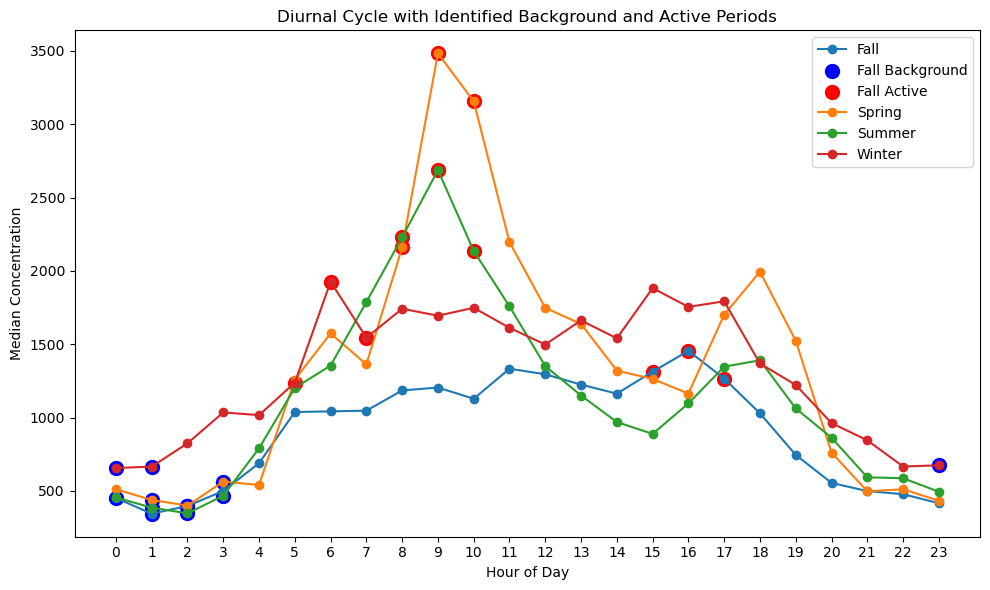

In [15]:
# 2. Define a season for each timestamp.
#    Here we use a common meteorological definition:
#       Winter: December, January, February
#       Spring: March, April, May
#       Summer: June, July, August
#       Fall: September, October, November
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Apply the season function and extract hour of day
N_2_5_5['season'] = N_2_5_5.index.map(get_season)
N_2_5_5['hour'] = N_2_5_5.index.hour

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the median concentration.
diurnal = N_2_5_5.groupby(['season', 'hour'])['concentration'].median().reset_index()

# 4. Identify background (min diurnal values) and active (max diurnal values) times,
#    and define a small window around these times.
#    For example, let’s use a window of ±1 hour.
window = 1  # Adjust this value if you want a wider or narrower range

print("Identified diurnal extremes per season (using original concentration values):")
for season in diurnal['season'].unique():
    # Subset the diurnal data for the current season.
    season_data = diurnal[diurnal['season'] == season].reset_index(drop=True)
    
    # Find the hour where the median concentration is minimum (background)
    min_idx = season_data['concentration'].idxmin()
    min_hour = season_data.loc[min_idx, 'hour']
    # Define the background period as a window around the min hour.
    # We use modulo 24 to handle boundary cases (e.g., near midnight).
    background_hours = sorted([(min_hour + h) % 24 for h in range(-window, window + 1)])
    
    # Find the hour where the median concentration is maximum (active)
    max_idx = season_data['concentration'].idxmax()
    max_hour = season_data.loc[max_idx, 'hour']
    active_hours = sorted([(max_hour + h) % 24 for h in range(-window, window + 1)])
    
    print(f"Season: {season.capitalize()}")
    print(f"  Background (min median concentration) around hour {min_hour}: hours {background_hours}")
    print(f"  Active (max median concentration) around hour {max_hour}: hours {active_hours}\n")

# 5. (Optional) Plot the diurnal cycle for each season and mark the identified ranges.
fig, ax = plt.subplots(figsize=(10, 6))
for season in diurnal['season'].unique():
    season_data = diurnal[diurnal['season'] == season]
    ax.plot(season_data['hour'], season_data['concentration'],
            marker='o', linestyle='-', label=season.capitalize())
    
    # Identify the background and active hours for this season
    min_idx = season_data['concentration'].idxmin()
    min_hour = season_data.loc[min_idx, 'hour']
    background_hours = sorted([(min_hour + h) % 24 for h in range(-window, window + 1)])
    
    max_idx = season_data['concentration'].idxmax()
    max_hour = season_data.loc[max_idx, 'hour']
    active_hours = sorted([(max_hour + h) % 24 for h in range(-window, window + 1)])
    
    # Plot markers for the background and active periods.
    # (We extract the median values for these hours for clarity.)
    bg_vals = season_data[season_data['hour'].isin(background_hours)]
    act_vals = season_data[season_data['hour'].isin(active_hours)]
    
    ax.scatter(bg_vals['hour'], bg_vals['concentration'], color='blue', s=100,
               label=f'{season.capitalize()} Background' if season == diurnal["season"].unique()[0] else "")
    ax.scatter(act_vals['hour'], act_vals['concentration'], color='red', s=100,
               label=f'{season.capitalize()} Active' if season == diurnal["season"].unique()[0] else "")

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Median Concentration')
ax.set_title('Diurnal Cycle with Identified Background and Active Periods')
ax.legend()
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()


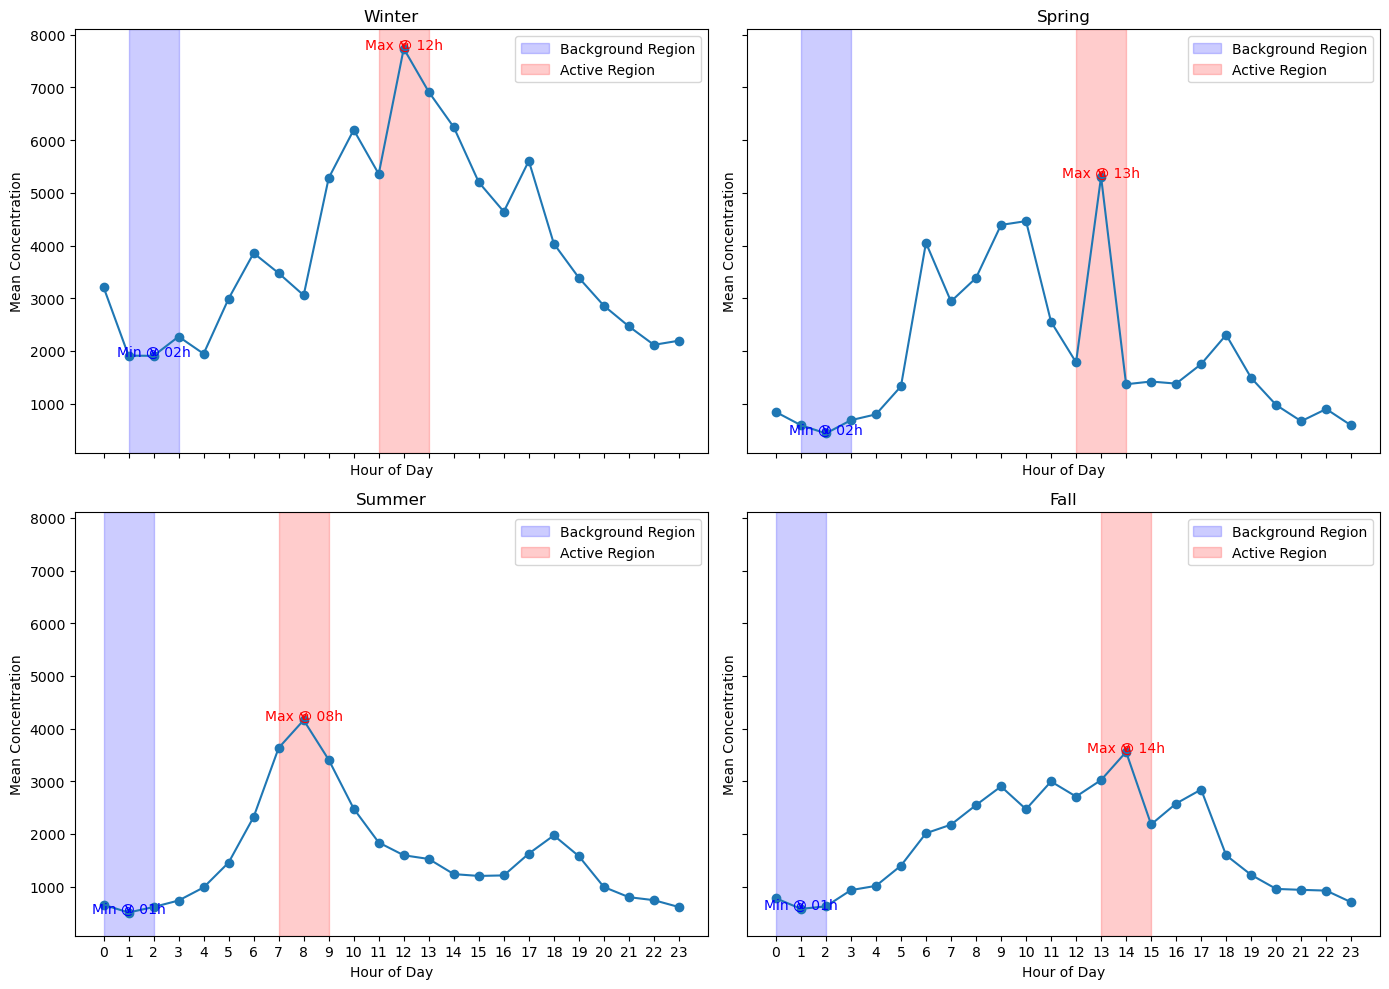

In [16]:
# --- 5. Create One Plot Per Season and Shade the Regions ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

seasons = ['winter', 'spring', 'summer', 'fall']

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the mean concentration.
diurnal = N_2_5_5.groupby(['season', 'hour'])['concentration'].mean().reset_index()

for i, season in enumerate(seasons):
    ax = axes[i]
    # Extract diurnal data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        # If there is no data for this season, skip plotting
        ax.set_title(season.capitalize() + " (No Data)")
        continue

    # Plot the diurnal cycle (mean concentration by hour)
    ax.plot(season_data['hour'], season_data['concentration'], marker='o', linestyle='-')
    
    # Identify the hour of minimum (background) and maximum (active) mean concentration
    background_hour = season_data.loc[season_data['concentration'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['concentration'].idxmax(), 'hour']
    
    # Define the shading regions.
    # Here, we assume the window does not need to wrap around midnight.
    bg_start = background_hour - window
    bg_end = background_hour + window
    act_start = active_hour - window
    act_end = active_hour + window
    
    # Shade the background region in blue with some transparency.
    ax.axvspan(bg_start, bg_end, color='blue', alpha=0.2, label='Background Region')
    # Shade the active region in red with some transparency.
    ax.axvspan(act_start, act_end, color='red', alpha=0.2, label='Active Region')
    
    # Set titles and labels
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Mean Concentration')
    ax.set_xticks(range(0, 24))
    
    # Optionally, annotate the extreme hours
    ax.annotate(f"Min @ {background_hour:02d}h", xy=(background_hour, season_data['concentration'].min()),
                xytext=(background_hour, season_data['concentration'].min()),
                arrowprops=dict(arrowstyle="->", color='blue'), color='blue', ha='center')
    ax.annotate(f"Max @ {active_hour:02d}h", xy=(active_hour, season_data['concentration'].max()),
                xytext=(active_hour, season_data['concentration'].max()),
                arrowprops=dict(arrowstyle="->", color='red'), color='red', ha='center')
    
    # Add legend (only show once per extreme region per subplot)
    ax.legend()

plt.tight_layout()
plt.show()


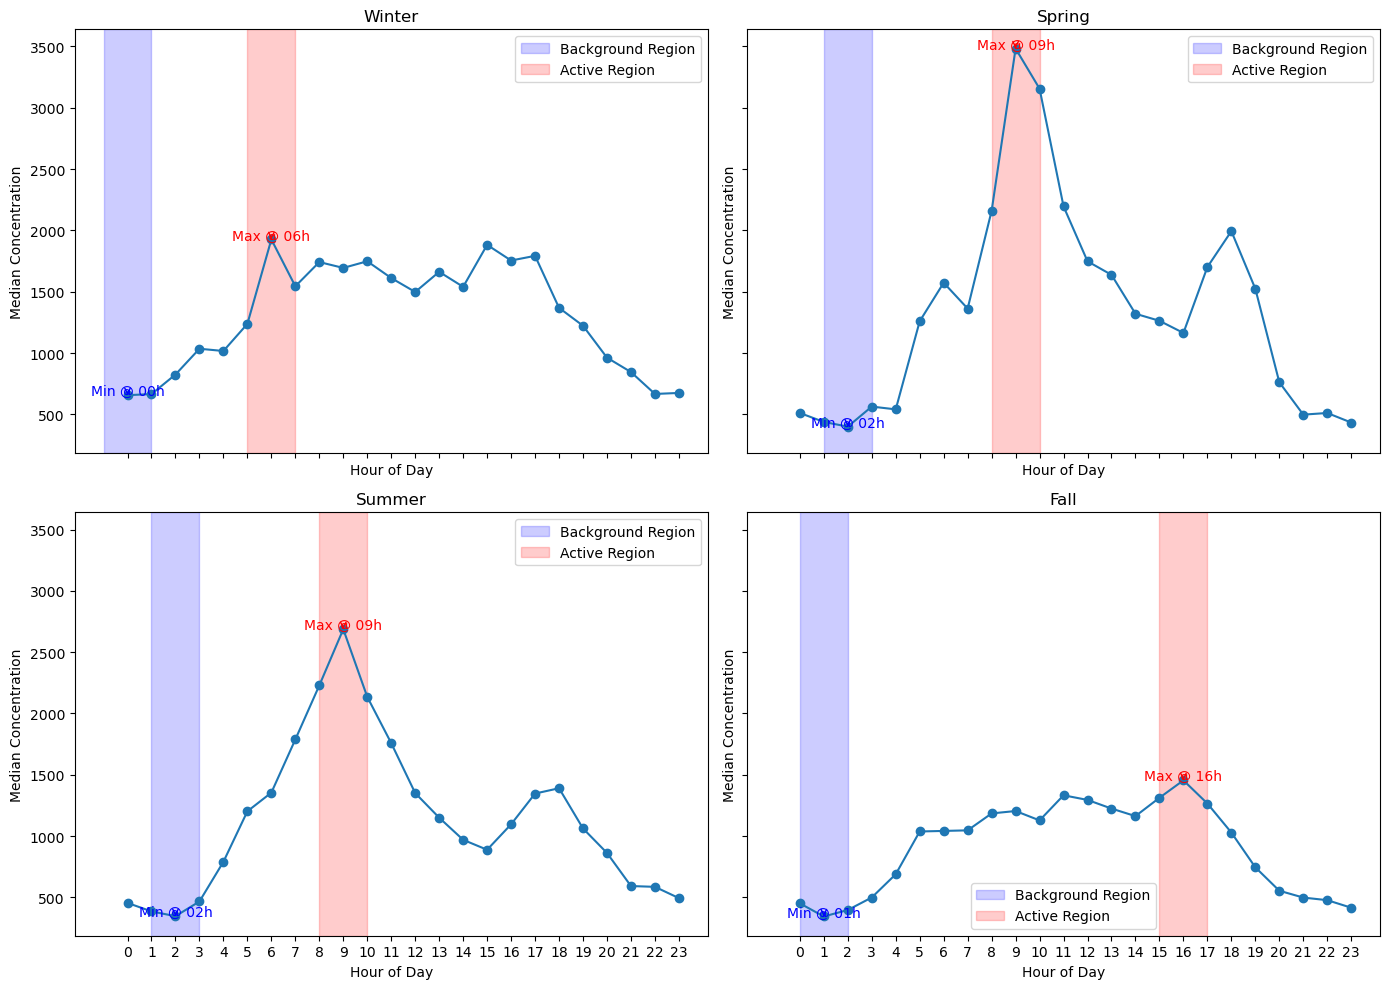

In [17]:
# --- 5. Create One Plot Per Season and Shade the Regions ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

seasons = ['winter', 'spring', 'summer', 'fall']

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the median concentration.
diurnal = N_2_5_5.groupby(['season', 'hour'])['concentration'].median().reset_index()

for i, season in enumerate(seasons):
    ax = axes[i]
    # Extract diurnal data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        # If there is no data for this season, skip plotting
        ax.set_title(season.capitalize() + " (No Data)")
        continue

    # Plot the diurnal cycle (median concentration by hour)
    ax.plot(season_data['hour'], season_data['concentration'], marker='o', linestyle='-')
    
    # Identify the hour of minimum (background) and maximum (active) median concentration
    background_hour = season_data.loc[season_data['concentration'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['concentration'].idxmax(), 'hour']
    
    # Define the shading regions.
    # Here, we assume the window does not need to wrap around midnight.
    bg_start = background_hour - window
    bg_end = background_hour + window
    act_start = active_hour - window
    act_end = active_hour + window
    
    # Shade the background region in blue with some transparency.
    ax.axvspan(bg_start, bg_end, color='blue', alpha=0.2, label='Background Region')
    # Shade the active region in red with some transparency.
    ax.axvspan(act_start, act_end, color='red', alpha=0.2, label='Active Region')
    
    # Set titles and labels
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Median Concentration')
    ax.set_xticks(range(0, 24))
    
    # Optionally, annotate the extreme hours
    ax.annotate(f"Min @ {background_hour:02d}h", xy=(background_hour, season_data['concentration'].min()),
                xytext=(background_hour, season_data['concentration'].min()),
                arrowprops=dict(arrowstyle="->", color='blue'), color='blue', ha='center')
    ax.annotate(f"Max @ {active_hour:02d}h", xy=(active_hour, season_data['concentration'].max()),
                xytext=(active_hour, season_data['concentration'].max()),
                arrowprops=dict(arrowstyle="->", color='red'), color='red', ha='center')
    
    # Add legend (only show once per extreme region per subplot)
    ax.legend()

plt.tight_layout()
plt.show()


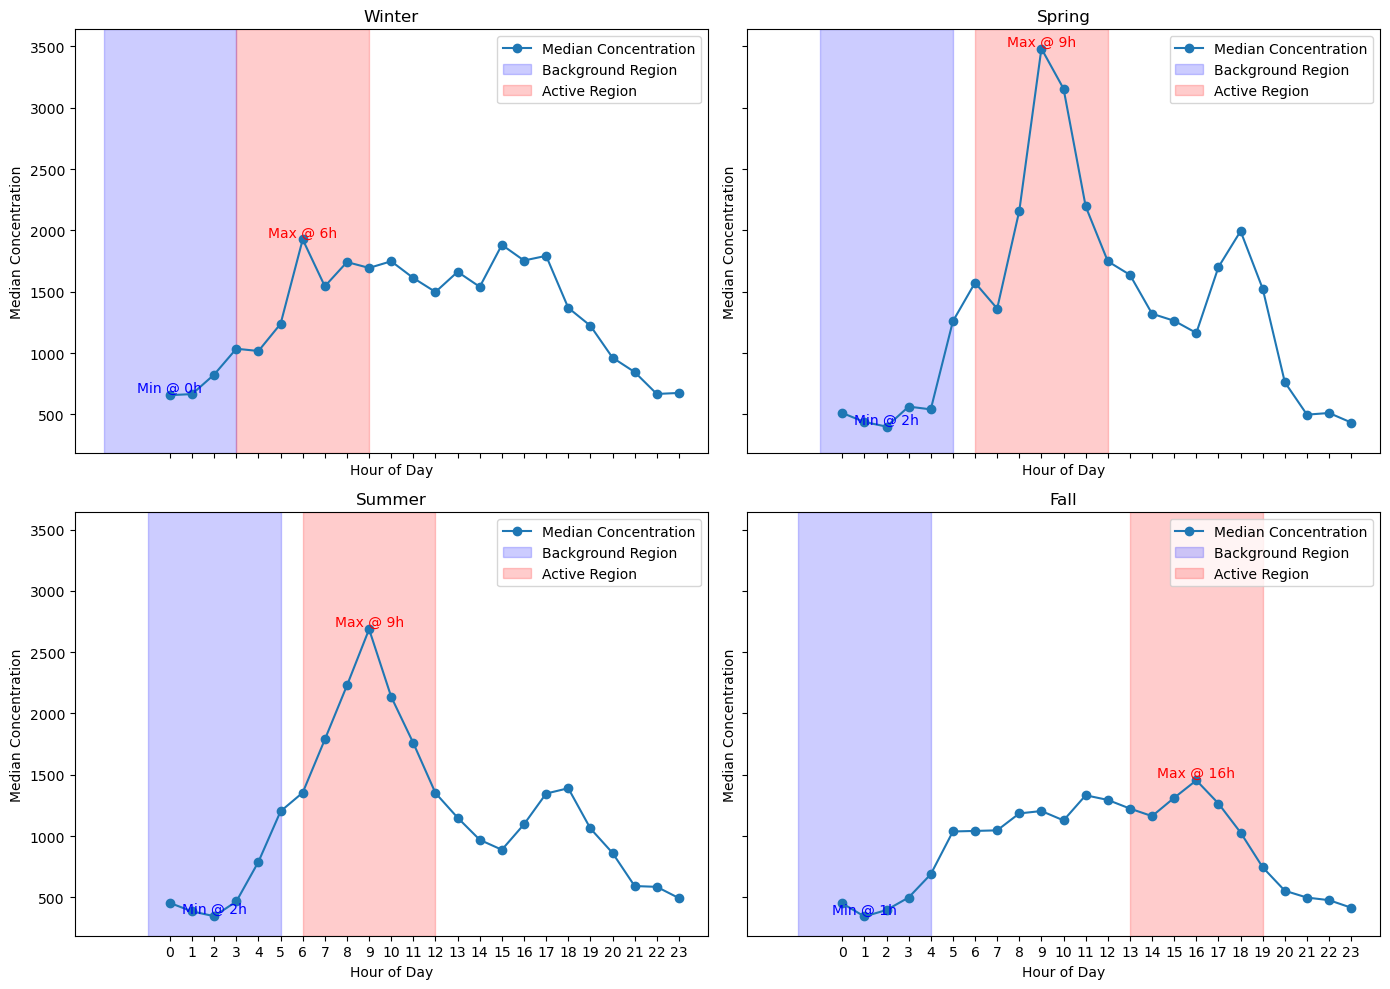

In [18]:
# --- 4. Set Up Plotting Parameters ---
seasons_order = ['winter', 'spring', 'summer', 'fall']
window = 3 # ±1 hour window around the extreme hour

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# --- 5. Loop Through Each Season and Plot ---
for ax, season in zip(axes, seasons_order):
    # Filter data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        ax.set_title(f"{season.capitalize()} (No Data)")
        continue

    # Plot the median diurnal cycle as a line with markers.
    ax.plot(season_data['hour'], season_data['concentration'], marker='o', linestyle='-', label='Median Concentration')
    
    # Identify background (minimum median) and active (maximum median) hours.
    background_hour = season_data.loc[season_data['concentration'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['concentration'].idxmax(), 'hour']
    
    # Shade ±1 hour around the background and active hours.
    ax.axvspan(background_hour - window, background_hour + window, color='blue', alpha=0.2, label='Background Region')
    ax.axvspan(active_hour - window, active_hour + window, color='red', alpha=0.2, label='Active Region')
    
    # Annotate the extreme points without any vertical offset.
    bg_value = season_data.loc[season_data['hour'] == background_hour, 'concentration'].values[0]
    act_value = season_data.loc[season_data['hour'] == active_hour, 'concentration'].values[0]
    
    ax.annotate(f"Min @ {int(background_hour)}h", 
                xy=(background_hour, bg_value),
                xycoords='data',
                color='blue', ha='center', va='bottom')
    
    ax.annotate(f"Max @ {int(active_hour)}h", 
                xy=(active_hour, act_value),
                xycoords='data',
                color='red', ha='center', va='bottom')
    
    # Set title and labels for each subplot.
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Median Concentration')
    ax.set_xticks(range(0, 24))
    ax.legend()

plt.tight_layout()
plt.show()


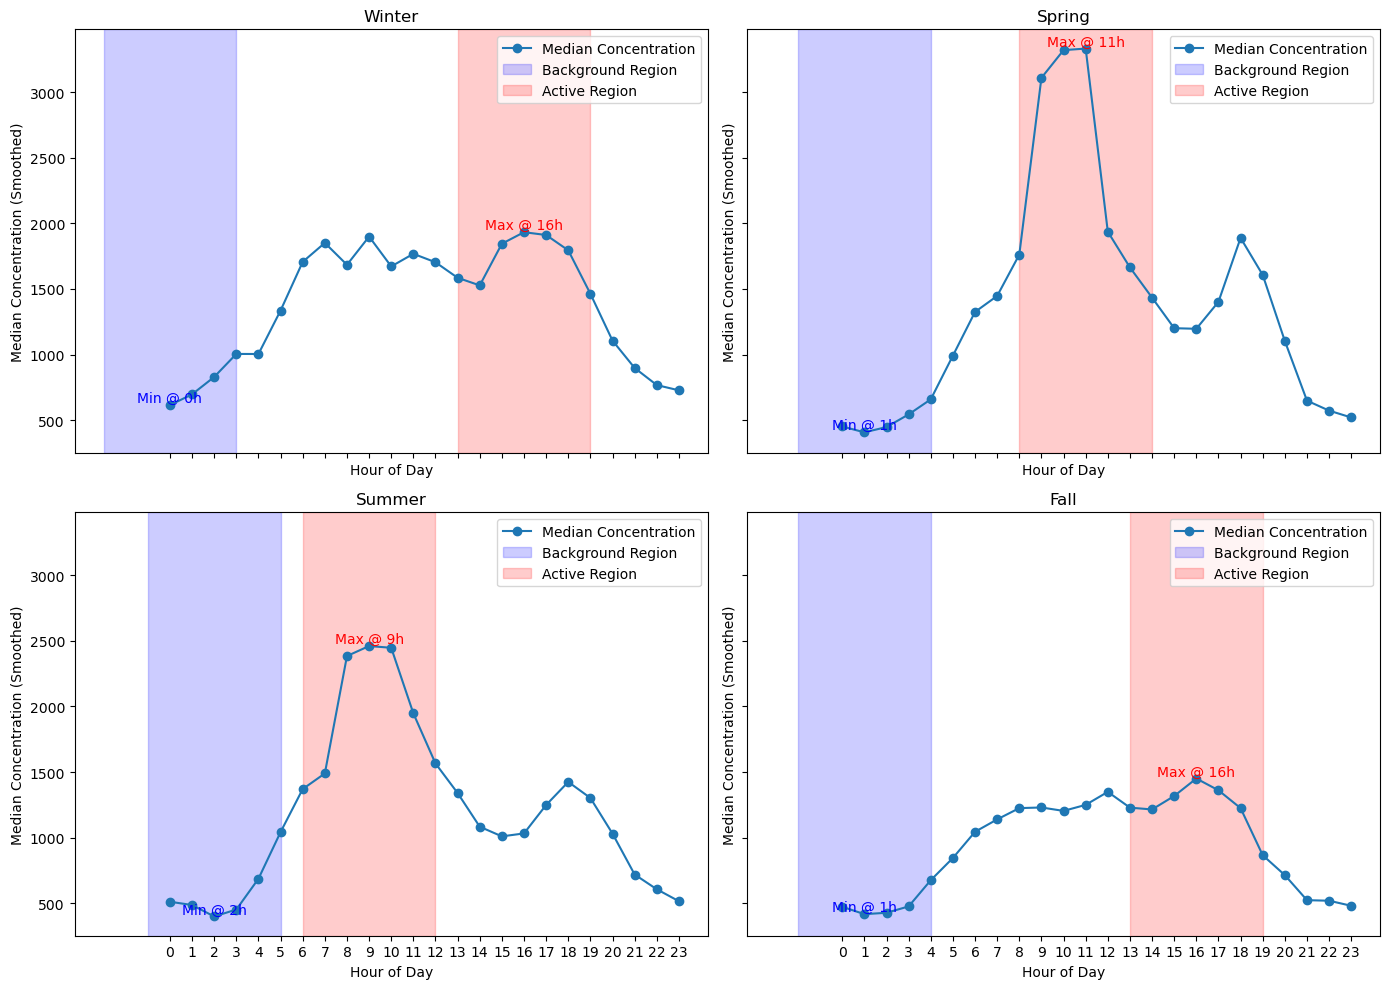

In [19]:
# --- 4. Set Up Plotting Parameters ---

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the median concentration.
diurnal = N_2_5_5.groupby(['season', 'hour'])['smoothed'].median().reset_index()

seasons_order = ['winter', 'spring', 'summer', 'fall']
window = 3 # ±1 hour window around the extreme hour

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# --- 5. Loop Through Each Season and Plot ---
for ax, season in zip(axes, seasons_order):
    # Filter data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        ax.set_title(f"{season.capitalize()} (No Data)")
        continue

    # Plot the median diurnal cycle as a line with markers.
    ax.plot(season_data['hour'], season_data['smoothed'], marker='o', linestyle='-', label='Median Concentration')
    
    # Identify background (minimum median) and active (maximum median) hours.
    background_hour = season_data.loc[season_data['smoothed'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['smoothed'].idxmax(), 'hour']
    
    # Shade ±1 hour around the background and active hours.
    ax.axvspan(background_hour - window, background_hour + window, color='blue', alpha=0.2, label='Background Region')
    ax.axvspan(active_hour - window, active_hour + window, color='red', alpha=0.2, label='Active Region')
    
    # Annotate the extreme points without any vertical offset.
    bg_value = season_data.loc[season_data['hour'] == background_hour, 'smoothed'].values[0]
    act_value = season_data.loc[season_data['hour'] == active_hour, 'smoothed'].values[0]
    
    ax.annotate(f"Min @ {int(background_hour)}h", 
                xy=(background_hour, bg_value),
                xycoords='data',
                color='blue', ha='center', va='bottom')
    
    ax.annotate(f"Max @ {int(active_hour)}h", 
                xy=(active_hour, act_value),
                xycoords='data',
                color='red', ha='center', va='bottom')
    
    # Set title and labels for each subplot.
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Median Concentration (Smoothed)')
    ax.set_xticks(range(0, 24))
    ax.legend()

plt.tight_layout()
plt.show()


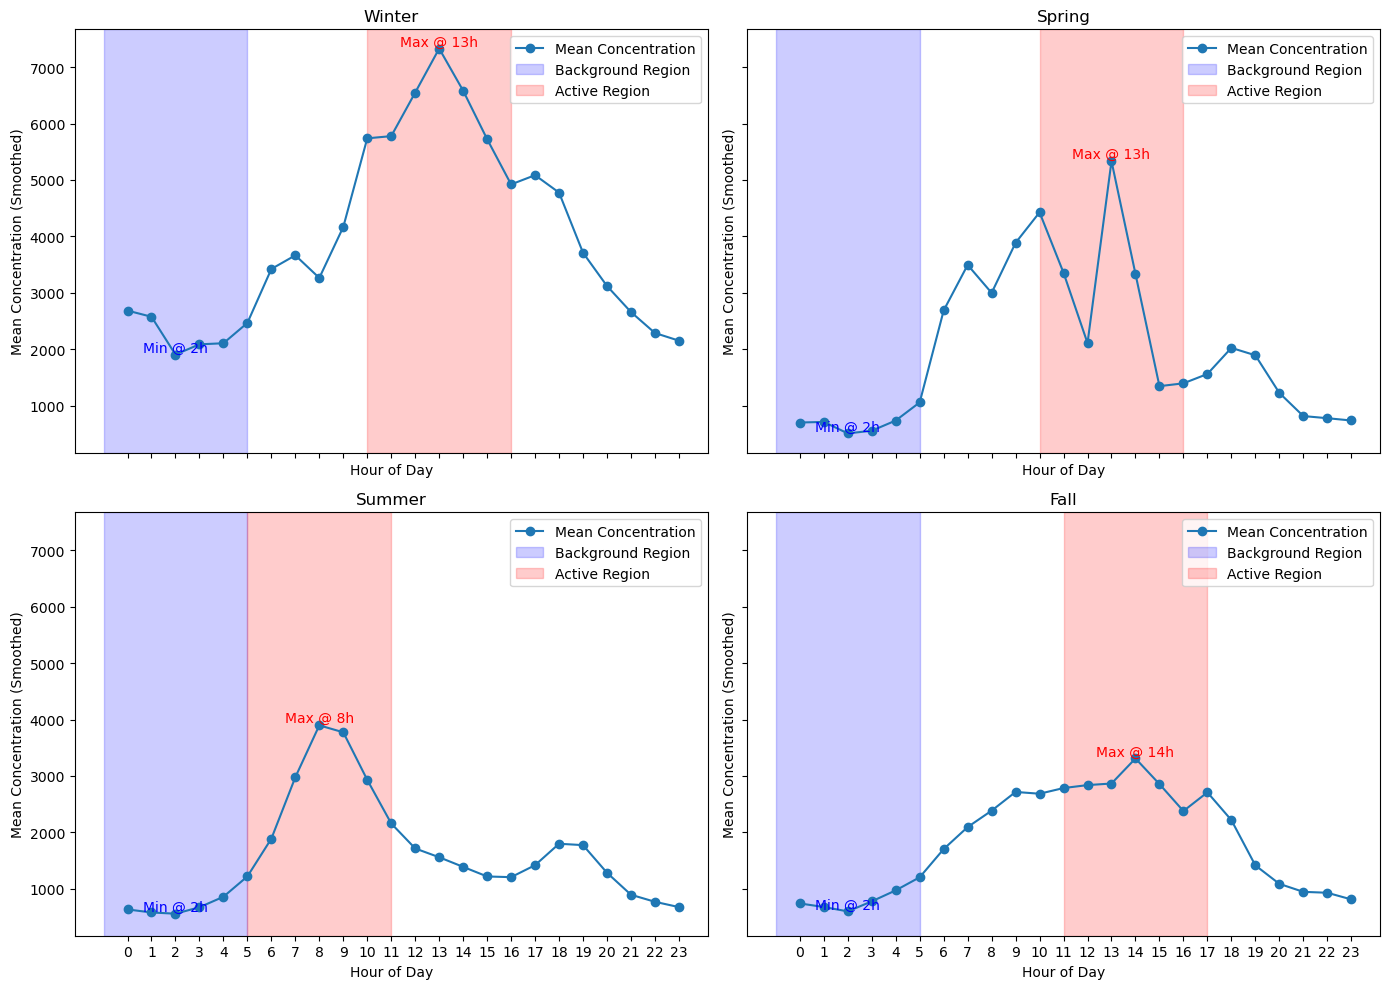

In [20]:
# --- 4. Set Up Plotting Parameters ---

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the mean concentration.
diurnal = N_2_5_5.groupby(['season', 'hour'])['smoothed'].mean().reset_index()

seasons_order = ['winter', 'spring', 'summer', 'fall']
window = 3 # ±1 hour window around the extreme hour

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# --- 5. Loop Through Each Season and Plot ---
for ax, season in zip(axes, seasons_order):
    # Filter data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        ax.set_title(f"{season.capitalize()} (No Data)")
        continue

    # Plot the mean diurnal cycle as a line with markers.
    ax.plot(season_data['hour'], season_data['smoothed'], marker='o', linestyle='-', label='Mean Concentration')
    
    # Identify background (minimum mean) and active (maximum mean) hours.
    background_hour = season_data.loc[season_data['smoothed'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['smoothed'].idxmax(), 'hour']
    
    # Shade ±1 hour around the background and active hours.
    ax.axvspan(background_hour - window, background_hour + window, color='blue', alpha=0.2, label='Background Region')
    ax.axvspan(active_hour - window, active_hour + window, color='red', alpha=0.2, label='Active Region')
    
    # Annotate the extreme points without any vertical offset.
    bg_value = season_data.loc[season_data['hour'] == background_hour, 'smoothed'].values[0]
    act_value = season_data.loc[season_data['hour'] == active_hour, 'smoothed'].values[0]
    
    ax.annotate(f"Min @ {int(background_hour)}h", 
                xy=(background_hour, bg_value),
                xycoords='data',
                color='blue', ha='center', va='bottom')
    
    ax.annotate(f"Max @ {int(active_hour)}h", 
                xy=(active_hour, act_value),
                xycoords='data',
                color='red', ha='center', va='bottom')
    
    # Set title and labels for each subplot.
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Mean Concentration (Smoothed)')
    ax.set_xticks(range(0, 24))
    ax.legend()

plt.tight_layout()
plt.show()


Winter season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 13, window: [10, 11, 12, 13, 14, 15, 16]

Spring season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 13, window: [10, 11, 12, 13, 14, 15, 16]

Summer season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 8, window: [5, 6, 7, 8, 9, 10, 11]

Fall season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 14, window: [11, 12, 13, 14, 15, 16, 17]

Daily Background (N_B) and Active (N_A) Concentrations:
        date  season          N_B           N_A
0 2024-05-16  spring          NaN  55464.064999
1 2024-05-17  spring   506.999044   1675.773555
2 2024-05-18  spring   880.237580   9315.303695
3 2024-05-19  spring   346.060757    322.175231
4 2024-05-20  spring  3482.836234   2488.202653


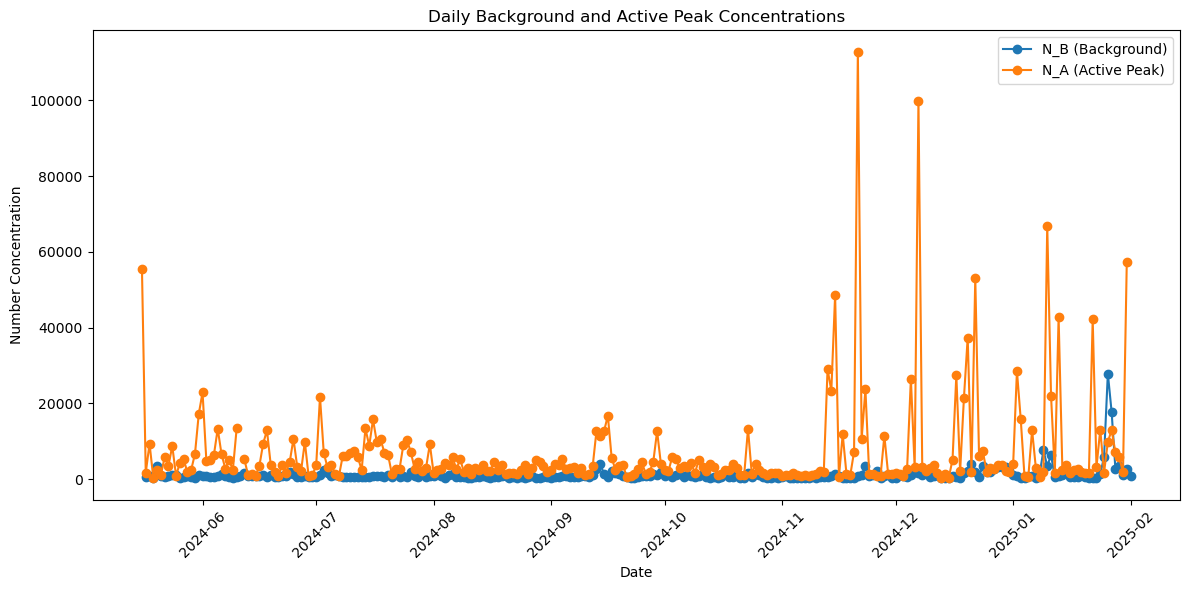

In [21]:

# === 3. Compute the Median Diurnal Cycle per Season ===
# Group by season and hour to compute the mean smoothed.
diurnal = N_2_5_5.groupby(['season', 'hour'])['smoothed'].mean().reset_index()

# Define a window (in hours) around the extreme hour.
window = 3  # ±1 hour

# For each season, identify the extreme hours and the window ranges.
seasons_order = ['winter', 'spring', 'summer', 'fall']
seasons_info = {}

for season in seasons_order:
    season_diurnal = diurnal[diurnal['season'] == season]
    if season_diurnal.empty:
        continue
    # Identify the hour (0-23) where the mean is minimum (background) and maximum (active)
    bg_hour = season_diurnal.loc[season_diurnal['smoothed'].idxmin(), 'hour']
    active_hour = season_diurnal.loc[season_diurnal['smoothed'].idxmax(), 'hour']
    # Create sets of hours for the background and active windows.
    # We use modulo 24 in case the window crosses midnight.
    bg_hours_set = {(bg_hour + h) % 24 for h in range(-window, window + 1)}
    active_hours_set = {(active_hour + h) % 24 for h in range(-window, window + 1)}
    seasons_info[season] = {
        'bg_hour': bg_hour,
        'active_hour': active_hour,
        'bg_hours_set': bg_hours_set,
        'active_hours_set': active_hours_set
    }
    
    # (Optional) Print the identified hours for debugging:
    print(f"{season.capitalize()} season:")
    print(f"  Background hour: {bg_hour}, window: {sorted(bg_hours_set)}")
    print(f"  Active hour: {active_hour}, window: {sorted(active_hours_set)}\n")

# === 4. Compute Daily N_B and N_A ===
# Create a new column for the date.
N_2_5_5['date'] = N_2_5_5.index.date

# Prepare a list to collect daily results.
daily_results = []

# Group the data by date.
for date, group in N_2_5_5.groupby('date'):
    # All rows in a day should belong to the same season (based on month)
    season = group['season'].iloc[0]
    # Get the background/active window info for this season.
    info = seasons_info.get(season, None)
    if info is None:
        # If no diurnal info is available for this season, skip this day.
        continue

    # For background (N_B): take the mean of concentrations when the hour is in the background window.
    bg_data = group[group['hour'].isin(info['bg_hours_set'])]['smoothed']
    N_B = bg_data.mean() if not bg_data.empty else np.nan

    # For active (N_A): take the maximum of concentrations when the hour is in the active window.
    active_data = group[group['hour'].isin(info['active_hours_set'])]['smoothed']
    N_A = active_data.max() if not active_data.empty else np.nan

    daily_results.append({'date': date, 'season': season, 'N_B': N_B, 'N_A': N_A})

# Create a DataFrame with the daily background and active concentrations.
daily_results_df = pd.DataFrame(daily_results)
daily_results_df['date'] = pd.to_datetime(daily_results_df['date'])  # Convert back to datetime if desired

print("Daily Background (N_B) and Active (N_A) Concentrations:")
print(daily_results_df.head())

# === 5. (Optional) Plot the Daily N_B and N_A Values ===
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_results_df['date'], daily_results_df['N_B'], marker='o', linestyle='-', label='N_B (Background)')
ax.plot(daily_results_df['date'], daily_results_df['N_A'], marker='o', linestyle='-', label='N_A (Active Peak)')
ax.set_xlabel('Date')
ax.set_ylabel('Number Concentration')
ax.set_title('Daily Background and Active Peak Concentrations')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
daily_results_df

,date,season,N_B,N_A
0,2024-05-16,spring,NaN,55464.064999
1,2024-05-17,spring,506.999044,1675.773555
2,2024-05-18,spring,880.237580,9315.303695
3,2024-05-19,spring,346.060757,322.175231
4,2024-05-20,spring,3482.836234,2488.202653
...,...,...,...,...
257,2025-01-28,winter,2613.776005,7056.940493
258,2025-01-29,winter,3420.195697,5833.552533
259,2025-01-30,winter,1112.437796,1736.405048
260,2025-01-31,winter,2724.950806,57361.517851


In [23]:
# Calculate the difference for each day
daily_results_df['N_diff'] = daily_results_df['N_A'] - daily_results_df['N_B']

daily_results_df


,date,season,N_B,N_A,N_diff
0,2024-05-16,spring,NaN,55464.064999,NaN
1,2024-05-17,spring,506.999044,1675.773555,1168.774511
2,2024-05-18,spring,880.237580,9315.303695,8435.066115
3,2024-05-19,spring,346.060757,322.175231,-23.885526
4,2024-05-20,spring,3482.836234,2488.202653,-994.633581
...,...,...,...,...,...
257,2025-01-28,winter,2613.776005,7056.940493,4443.164488
258,2025-01-29,winter,3420.195697,5833.552533,2413.356835
259,2025-01-30,winter,1112.437796,1736.405048,623.967252
260,2025-01-31,winter,2724.950806,57361.517851,54636.567045


Daily differences with quantile ranking:
        date       N_diff diff_quantile
0 2024-05-16          NaN           NaN
1 2024-05-17  1168.774511        30-35%
2 2024-05-18  8435.066115        80-85%
3 2024-05-19   -23.885526         5-10%
4 2024-05-20  -994.633581          0-5%


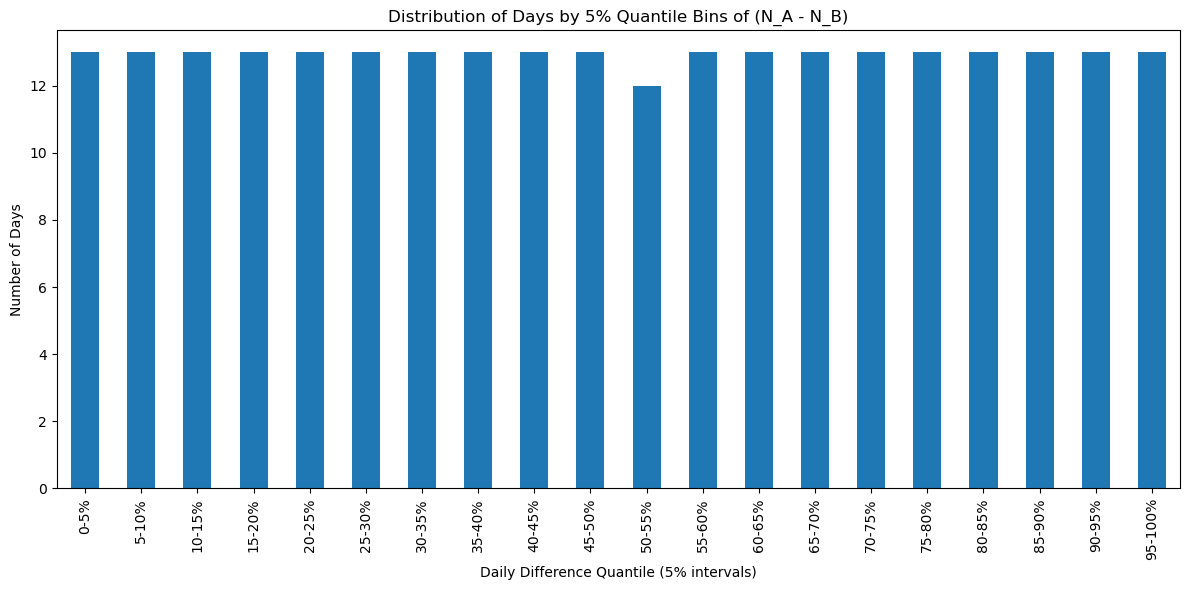

In [24]:
# Create labels for each bin (e.g., "0-5%", "5-10%", ..., "95-100%")
labels = [f"{i*5}-{(i+1)*5}%" for i in range(20)]
daily_results_df['diff_quantile'] = pd.qcut(daily_results_df['N_diff'], q=20, labels=labels)

# Check the first few rows to verify the ranking:
print("Daily differences with quantile ranking:")
print(daily_results_df[['date', 'N_diff', 'diff_quantile']].head())

# --- 2. (Optional) Plot a Histogram of the Ranked Days ---
plt.figure(figsize=(12, 6))
daily_results_df['diff_quantile'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Daily Difference Quantile (5% intervals)')
plt.ylabel('Number of Days')
plt.title('Distribution of Days by 5% Quantile Bins of (N_A - N_B)')
plt.tight_layout()
plt.show()

In [25]:
# Function to return the median day for a given quantile group
def get_median_day(group):
    # Calculate the median N_diff value for this quantile group
    median_val = group['N_diff'].median()
    # Find the index of the row where N_diff is closest to the median
    idx = (group['N_diff'] - median_val).abs().idxmin()
    return group.loc[idx]

# Group by the quantile and apply the function to get one representative median day per group
median_days = daily_results_df.groupby('diff_quantile').apply(get_median_day).reset_index(drop=True)

# Display the median day per quantile group (showing date, quantile, and N_diff)
print("Median day for each 5% quantile group:")
print(median_days[['date', 'diff_quantile', 'N_diff']])


Median day for each 5% quantile group:
         date diff_quantile        N_diff
0  2024-11-26          0-5%  -1209.321487
1  2024-12-13         5-10%     75.517504
2  2024-12-12        10-15%    367.797141
3  2024-10-02        15-20%    544.418652
4  2024-10-28        20-25%    716.314911
5  2024-12-06        25-30%    917.584578
6  2024-10-31        30-35%   1108.778031
7  2024-12-01        35-40%   1293.955374
8  2024-09-05        40-45%   1675.158904
9  2024-08-18        45-50%   1954.070184
10 2024-06-09        50-55%   2116.773689
11 2025-01-07        55-60%   2634.095543
12 2024-10-06        60-65%   2995.272978
13 2024-10-19        65-70%   3577.912757
14 2024-10-10        70-75%   4437.308014
15 2024-07-20        75-80%   5248.977582
16 2024-07-15        80-85%   8133.829277
17 2024-09-15        85-90%  11381.954823
18 2024-09-16        90-95%  16125.859677
19 2025-01-13       95-100%  41986.952427


/tmp/ipykernel_75461/4008519197.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_days = daily_results_df.groupby('diff_quantile').apply(get_median_day).reset_index(drop=True)


In [26]:
from numpy import ma
from matplotlib import ticker, cm
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('dN/dlogDp (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)


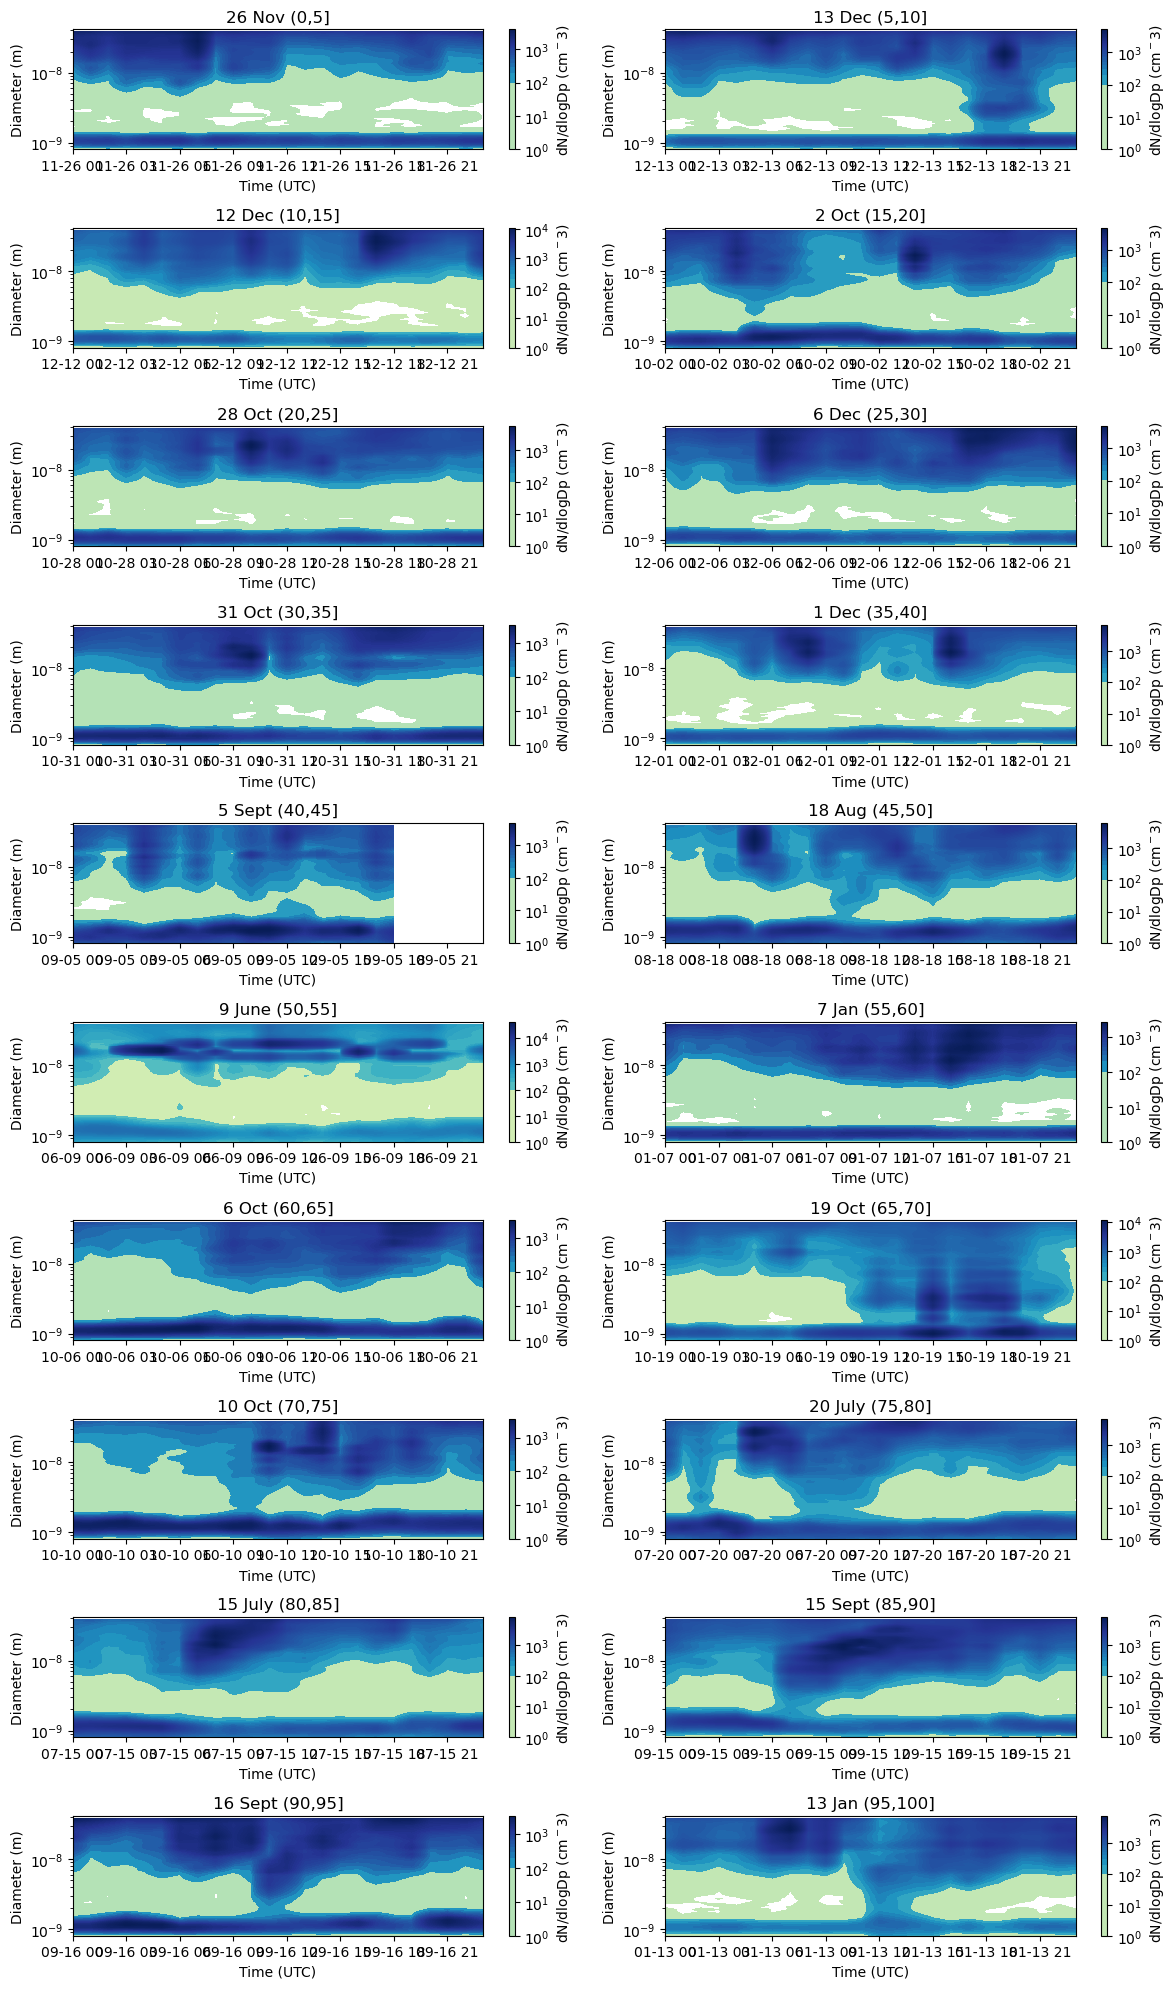

In [27]:
# Set up the plots
fig, axs = plt.subplots(10, 2, figsize=(12, 20))
axs = axs.ravel()

plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-11-26','2024-11-26')), '26 Nov (0,5]', axs[0])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-12-13','2024-12-13')), '13 Dec (5,10]', axs[1])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-12-12','2024-12-12')), '12 Dec (10,15]', axs[2])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-02','2024-10-02')), '2 Oct (15,20]', axs[3])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-28','2024-10-28')), '28 Oct (20,25]', axs[4])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-12-06','2024-12-06')), '6 Dec (25,30]', axs[5])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-31','2024-10-31')), '31 Oct (30,35]', axs[6])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-12-01','2024-12-01')), '1 Dec (35,40]', axs[7])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-09-05','2024-09-05')), '5 Sept (40,45]', axs[8])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-18','2024-08-18')), '18 Aug (45,50]', axs[9])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-09','2024-06-09')), '9 June (50,55]', axs[10])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2025-01-07','2025-01-07')), '7 Jan (55,60]', axs[11])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-06','2024-10-06')), '6 Oct (60,65]', axs[12])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-19','2024-10-19')), '19 Oct (65,70]', axs[13])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-10-10','2024-10-10')), '10 Oct (70,75]', axs[14])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-20','2024-07-20')), '20 July (75,80]', axs[15])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-15','2024-07-15')), '15 July (80,85]', axs[16])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-09-15','2024-09-15')), '15 Sept (85,90]', axs[17])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-09-16','2024-09-16')), '16 Sept (90,95]', axs[18])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2025-01-13','2025-01-13')), '13 Jan (95,100]', axs[19])

plt.tight_layout()
plt.show()

### Introduce met data

In [31]:
met_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Met/met_jan_dec.csv')

In [32]:
met_data['datetime'] = pd.to_datetime(met_data['date'] + ' ' + met_data['time'])
met_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
met_data.index = met_data['datetime']
met_data

,day_dec,WD_min[Deg],WD_ave[Deg],WD_max[Deg],WS_min[m/s],WS_ave[m/s],WS_max[m/s],T_air[C],T_internal[C],RH[%%],...,Hail_acc[hits/cm2],Hail_duration[s],Hail_intensity[hits/cm2],Rain_peak_int[mm/h],Hail_peak_int[hits/cm2],T_heat[C],V_heat[V],Vsupply[V],Vref3.5[V],datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.000000,252.0,224.5,218.0,0.9,3.2,5.1,8.8,8.9,87.8,...,0.0,0.0,0.0,86.0,6.0,7.7,0.0,9.5,3.496,2024-01-01 00:00:00
2024-01-01 00:01:00,0.000694,273.0,232.9,222.0,0.6,1.7,3.4,8.8,8.9,87.8,...,0.0,0.0,0.0,86.0,6.0,7.9,0.0,9.4,3.494,2024-01-01 00:01:00
2024-01-01 00:02:00,0.001389,185.0,243.0,227.0,0.7,3.1,6.5,8.8,8.9,87.8,...,0.0,0.0,0.0,86.0,6.0,7.9,0.0,9.5,3.497,2024-01-01 00:02:00
2024-01-01 00:03:00,0.002083,337.0,236.1,243.0,1.1,4.0,7.2,8.8,8.9,87.8,...,0.0,0.0,0.0,86.0,6.0,8.1,0.0,9.5,3.494,2024-01-01 00:03:00
2024-01-01 00:04:00,0.002778,248.0,233.8,224.0,1.5,3.4,5.8,8.8,8.9,87.8,...,0.0,0.0,0.0,86.0,6.0,7.9,0.0,9.3,3.496,2024-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,365.996528,225.0,244.2,302.0,0.6,1.2,1.8,4.6,4.6,75.5,...,0.0,0.0,0.0,19.2,0.0,2.7,0.0,9.6,3.494,2024-12-31 23:55:00
2024-12-31 23:56:00,365.997222,221.0,205.2,39.0,0.3,1.0,1.9,4.6,4.6,75.5,...,0.0,0.0,0.0,19.2,0.0,2.9,0.0,9.6,3.494,2024-12-31 23:56:00
2024-12-31 23:57:00,365.997917,186.0,223.3,326.0,0.4,1.0,2.1,4.7,4.6,75.6,...,0.0,0.0,0.0,19.2,0.0,3.2,0.0,9.6,3.494,2024-12-31 23:57:00


In [33]:
met_data = met_data.resample('1h').mean()

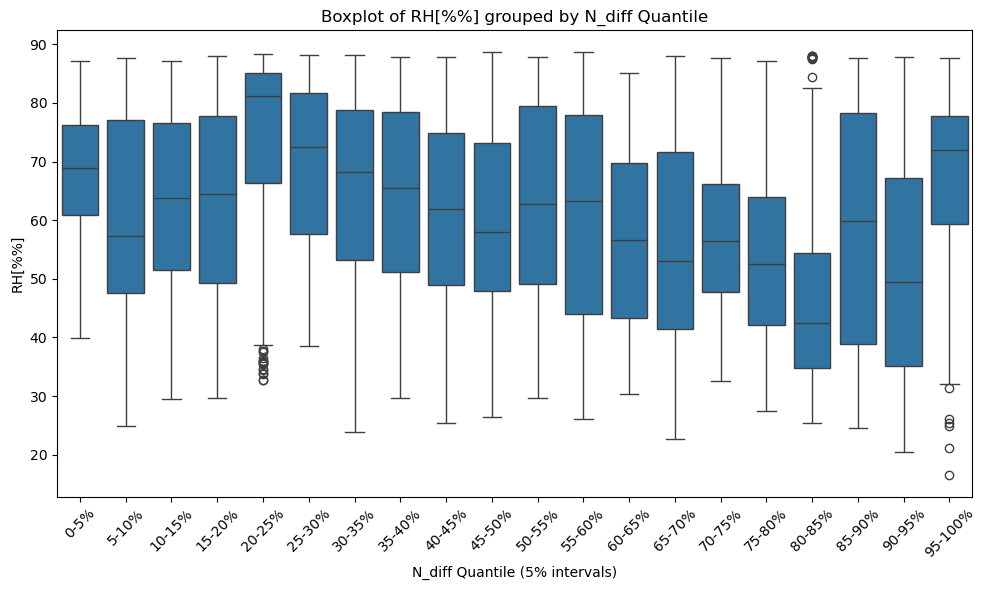

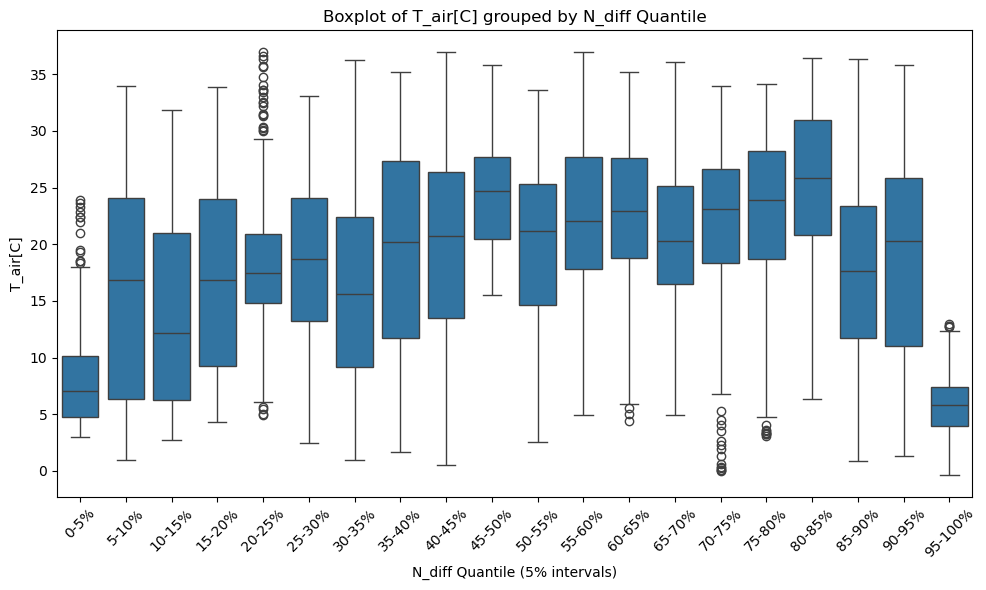

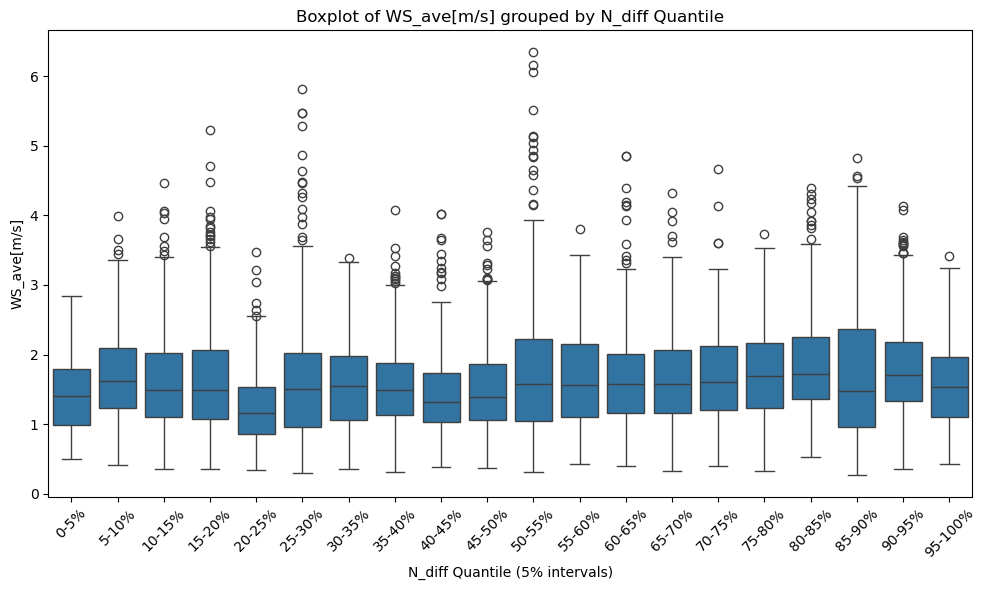

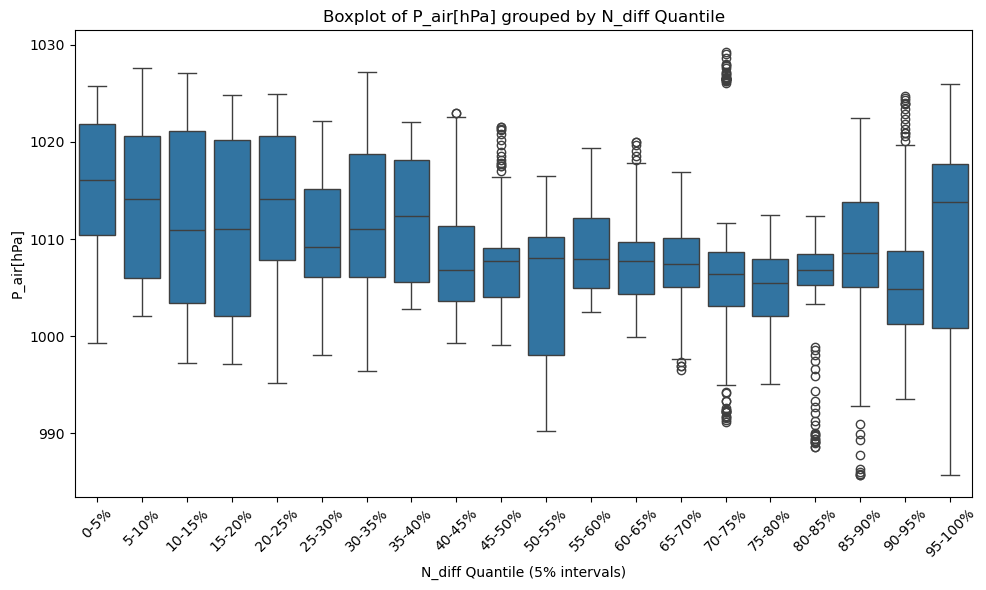

In [34]:
import seaborn as sns

# ...

# --- 2. Create a 'date' Column in met_data from the Datetime Index ---
met_data['date'] = met_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
met_df_merged = met_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
met_vars = ['RH[%%]', 'T_air[C]', 'WS_ave[m/s]', 'P_air[hPa]']  # Adjust the variable names as needed

for var in met_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=met_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [46]:
# NOx data
nox_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Pollutants/nox_2024.csv')


In [47]:
nox_data['datetime'] = pd.to_datetime(nox_data['date'] + ' ' + nox_data['time'])
nox_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
nox_data.index = nox_data['datetime']
nox_data

,daydec,NO[ppb],NO2[ppb],NOx[ppb],Pre,Pre_low,Pre_High,T_int,ReactCellT[C],T_Cooler,PMT_V,T_NO2_conv,ReactCellP[incHg],O3_flow[cc/m],SampleFlow[cc/m],status,warning,datetime
datetime,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.000000,0.413,1.341,1.754,-999,-999,-999,32.847,39.994,5.133,483.438,0,1.314,88.842,1119.423,SAMPLE,0,2024-01-01 00:00:00
2024-01-01 00:01:00,0.000694,0.437,1.333,1.770,-999,-999,-999,32.837,39.991,5.132,483.445,0,1.315,89.122,1118.973,SAMPLE,0,2024-01-01 00:01:00
2024-01-01 00:02:00,0.001389,0.458,1.331,1.789,-999,-999,-999,32.814,39.994,5.130,483.460,0,1.314,88.848,1118.337,SAMPLE,0,2024-01-01 00:02:00
2024-01-01 00:03:00,0.002083,0.467,1.338,1.805,-999,-999,-999,32.848,39.994,5.130,483.445,0,1.314,89.010,1118.262,SAMPLE,0,2024-01-01 00:03:00
2024-01-01 00:04:00,0.002778,0.470,1.356,1.825,-999,-999,-999,32.890,39.991,5.131,483.437,0,1.314,88.743,1118.179,SAMPLE,0,2024-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,365.996528,1.094,10.400,11.493,-999,-999,-999,32.176,39.985,-1.194,483.255,0,1.381,90.525,1138.667,SAMPLE,10000000000,2024-12-31 23:55:00
2024-12-31 23:56:00,365.997222,1.060,10.441,11.501,-999,-999,-999,32.150,39.986,-1.209,483.097,0,1.381,90.516,1138.421,SAMPLE,10000000000,2024-12-31 23:56:00
2024-12-31 23:57:00,365.997917,1.065,10.431,11.495,-999,-999,-999,32.143,39.985,-1.211,483.247,0,1.380,90.396,1139.758,SAMPLE,10000000000,2024-12-31 23:57:00


In [ ]:

# Replace values with NaN where 'status' is 'SPAN'
nox_data.loc[nox_data['status'] == 'SPAN', ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = np.nan

# Replace values less than 0 with NaN in specific columns (if physically impossible)
nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].map(lambda x: np.nan if x < 0 else x)

/tmp/ipykernel_75461/1278550825.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].applymap(lambda x: np.nan if x < 0 else x)


In [49]:
nox_data

,daydec,NO[ppb],NO2[ppb],NOx[ppb],Pre,Pre_low,Pre_High,T_int,ReactCellT[C],T_Cooler,PMT_V,T_NO2_conv,ReactCellP[incHg],O3_flow[cc/m],SampleFlow[cc/m],status,warning,datetime
datetime,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.000000,0.413,1.341,1.754,-999,-999,-999,32.847,39.994,5.133,483.438,0,1.314,88.842,1119.423,SAMPLE,0,2024-01-01 00:00:00
2024-01-01 00:01:00,0.000694,0.437,1.333,1.770,-999,-999,-999,32.837,39.991,5.132,483.445,0,1.315,89.122,1118.973,SAMPLE,0,2024-01-01 00:01:00
2024-01-01 00:02:00,0.001389,0.458,1.331,1.789,-999,-999,-999,32.814,39.994,5.130,483.460,0,1.314,88.848,1118.337,SAMPLE,0,2024-01-01 00:02:00
2024-01-01 00:03:00,0.002083,0.467,1.338,1.805,-999,-999,-999,32.848,39.994,5.130,483.445,0,1.314,89.010,1118.262,SAMPLE,0,2024-01-01 00:03:00
2024-01-01 00:04:00,0.002778,0.470,1.356,1.825,-999,-999,-999,32.890,39.991,5.131,483.437,0,1.314,88.743,1118.179,SAMPLE,0,2024-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,365.996528,1.094,10.400,11.493,-999,-999,-999,32.176,39.985,-1.194,483.255,0,1.381,90.525,1138.667,SAMPLE,10000000000,2024-12-31 23:55:00
2024-12-31 23:56:00,365.997222,1.060,10.441,11.501,-999,-999,-999,32.150,39.986,-1.209,483.097,0,1.381,90.516,1138.421,SAMPLE,10000000000,2024-12-31 23:56:00
2024-12-31 23:57:00,365.997917,1.065,10.431,11.495,-999,-999,-999,32.143,39.985,-1.211,483.247,0,1.380,90.396,1139.758,SAMPLE,10000000000,2024-12-31 23:57:00


In [50]:
nox_data = nox_data[['NO2[ppb]','NO[ppb]','NOx[ppb]']].resample('1h').mean()

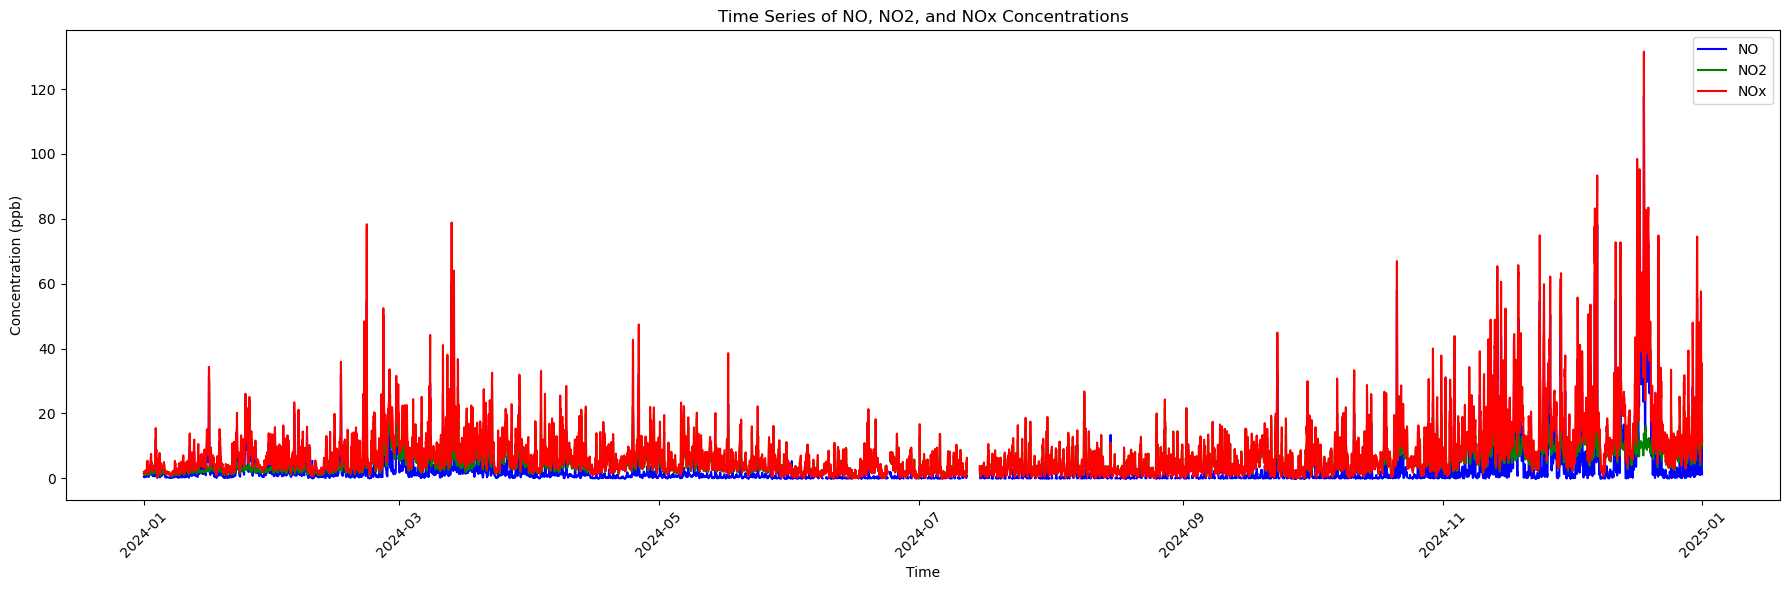

In [51]:
plt.figure(figsize=(18, 6))

# Plot NO data
plt.plot(nox_data.index, nox_data['NO[ppb]'], label='NO', color='blue')

# Plot NO2 data
plt.plot(nox_data.index, nox_data['NO2[ppb]'], label='NO2', color='green')

# Plot NOx data
plt.plot(nox_data.index, nox_data['NOx[ppb]'], label='NOx', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Concentration (ppb)')
plt.title('Time Series of NO, NO2, and NOx Concentrations')
plt.legend()

# Improve formatting for the x-axis (rotating date labels)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

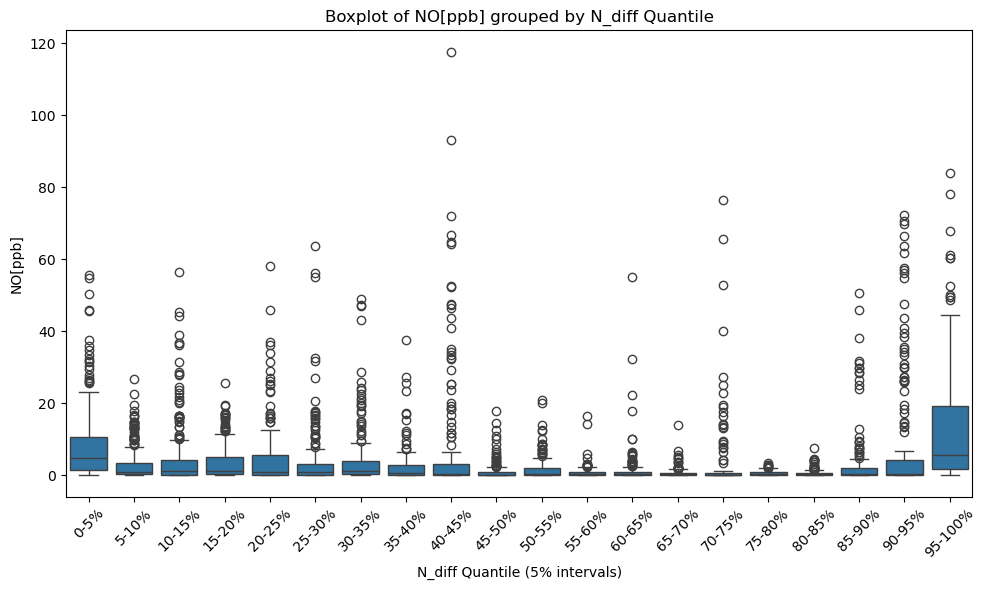

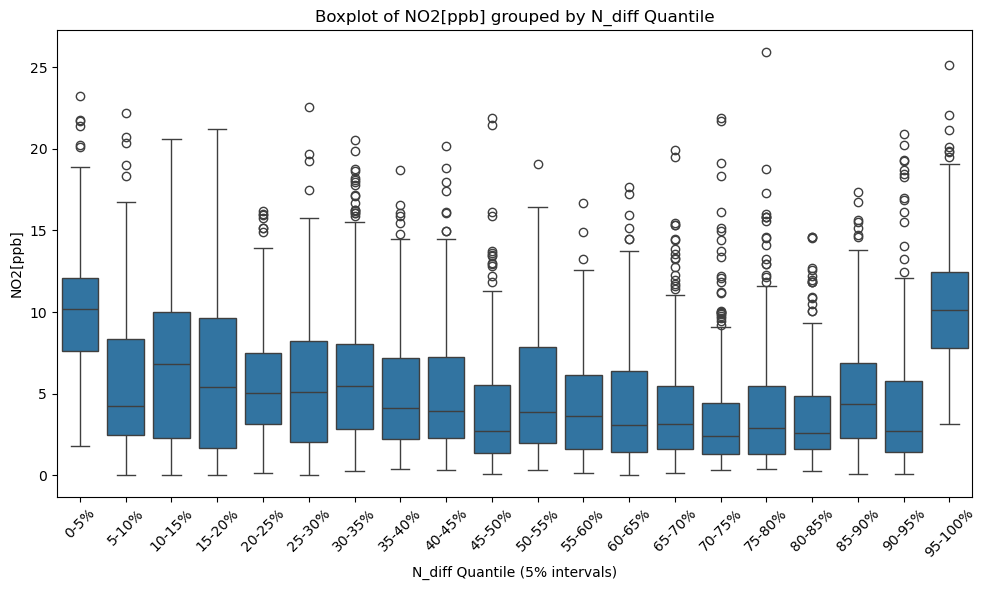

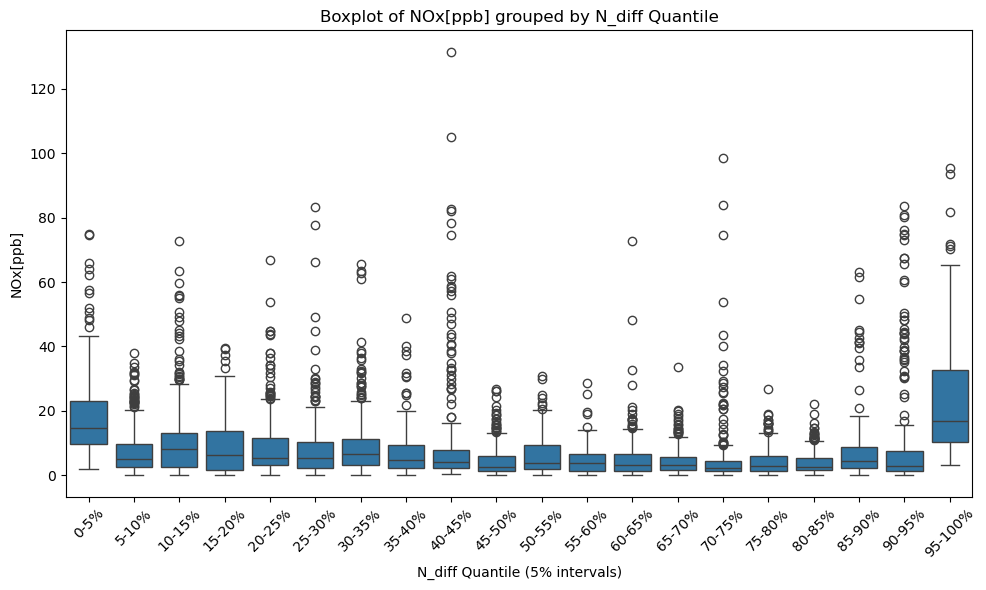

In [52]:
import seaborn as sns

# ...

# --- 2. Create a 'date' Column in nox_data from the Datetime Index ---
nox_data['date'] = nox_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
nox_df_merged = nox_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
nox_vars = ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']  # Adjust the variable names as needed

for var in nox_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=nox_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### NPF mode fitting

In [53]:
daily_results_df

,date,season,N_B,N_A,N_diff,diff_quantile
0,2024-05-16,spring,NaN,55464.064999,NaN,NaN
1,2024-05-17,spring,506.999044,1675.773555,1168.774511,30-35%
2,2024-05-18,spring,880.237580,9315.303695,8435.066115,80-85%
3,2024-05-19,spring,346.060757,322.175231,-23.885526,5-10%
4,2024-05-20,spring,3482.836234,2488.202653,-994.633581,0-5%
...,...,...,...,...,...,...
257,2025-01-28,winter,2613.776005,7056.940493,4443.164488,70-75%
258,2025-01-29,winter,3420.195697,5833.552533,2413.356835,55-60%
259,2025-01-30,winter,1112.437796,1736.405048,623.967252,15-20%
260,2025-01-31,winter,2724.950806,57361.517851,54636.567045,95-100%


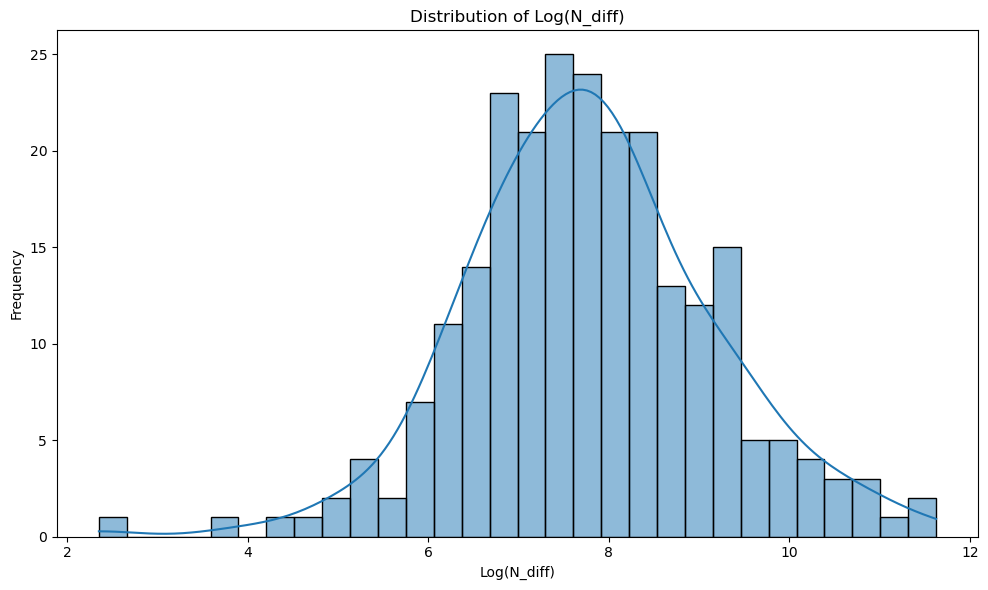

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Calculate the log of N_diff ---
# Ensure that all N_diff values are positive before taking the log.
# If necessary, you could filter out or adjust non-positive values.
daily_results_df = daily_results_df[daily_results_df['N_diff'] > 0].copy()

# Calculate the natural logarithm; you could also use np.log10() for base-10
daily_results_df['log_N_diff'] = np.log(daily_results_df['N_diff'])

# --- 2. Plot the Distribution of log(N_diff) ---
plt.figure(figsize=(10, 6))
sns.histplot(daily_results_df['log_N_diff'], bins=30, kde=True)
plt.xlabel('Log(N_diff)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(N_diff)')
plt.tight_layout()
plt.show()


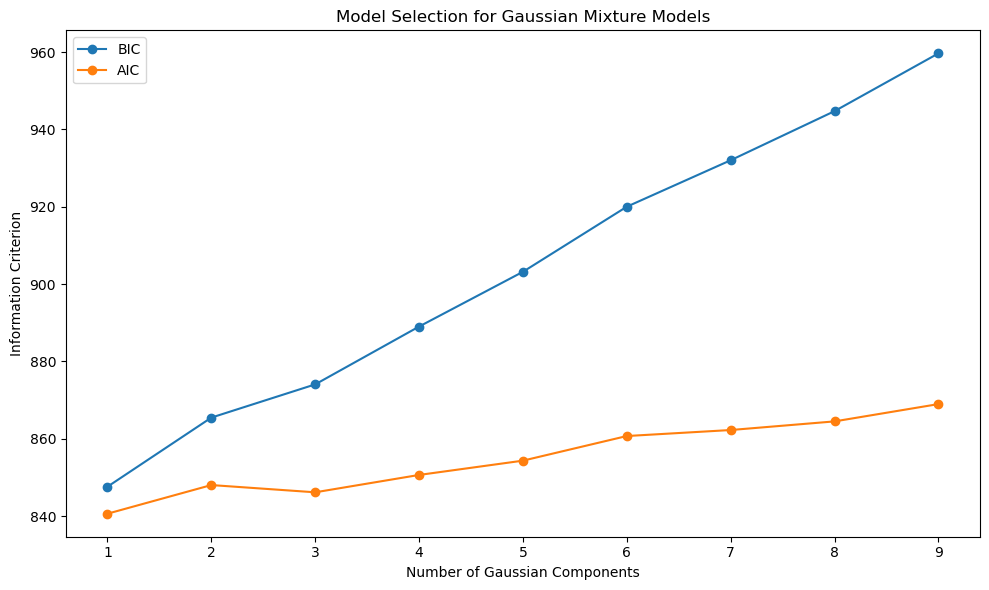

Optimal number of Gaussian components based on BIC: 1


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Use the log-transformed N_diff values (reshape to a 2D array for sklearn)
X = daily_results_df['log_N_diff'].values.reshape(-1, 1)

# Define a range of components to test, e.g., from 1 to 9 components.
n_components_range = range(1, 10)

# Lists to store the computed BIC and AIC values for each model.
bics = []
aics = []

for n in n_components_range:
    # Fit the Gaussian Mixture Model with n components
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    # Append the BIC and AIC for the current model.
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

# Plot the BIC and AIC values as a function of the number of components.
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of Gaussian Components')
plt.ylabel('Information Criterion')
plt.title('Model Selection for Gaussian Mixture Models')
plt.legend()
plt.tight_layout()
plt.show()

# Determine the optimal number of components (minimizes BIC)
optimal_components = n_components_range[np.argmin(bics)]
print("Optimal number of Gaussian components based on BIC:", optimal_components)


In [56]:
N_2_5_5

,concentration,smoothed,season,hour,date
time,,,,,
2024-05-16 00:00:00,NaN,NaN,spring,0,2024-05-16
2024-05-16 01:00:00,NaN,NaN,spring,1,2024-05-16
2024-05-16 02:00:00,NaN,NaN,spring,2,2024-05-16
2024-05-16 03:00:00,NaN,NaN,spring,3,2024-05-16
2024-05-16 04:00:00,NaN,NaN,spring,4,2024-05-16
...,...,...,...,...,...
2025-01-31 20:00:00,10080.968792,9759.139919,winter,20,2025-01-31
2025-01-31 21:00:00,7406.416455,8743.692623,winter,21,2025-01-31
2025-01-31 22:00:00,7819.420487,7612.918471,winter,22,2025-01-31


gmm_label
0    153
2     48
1     41
Name: count, dtype: int64


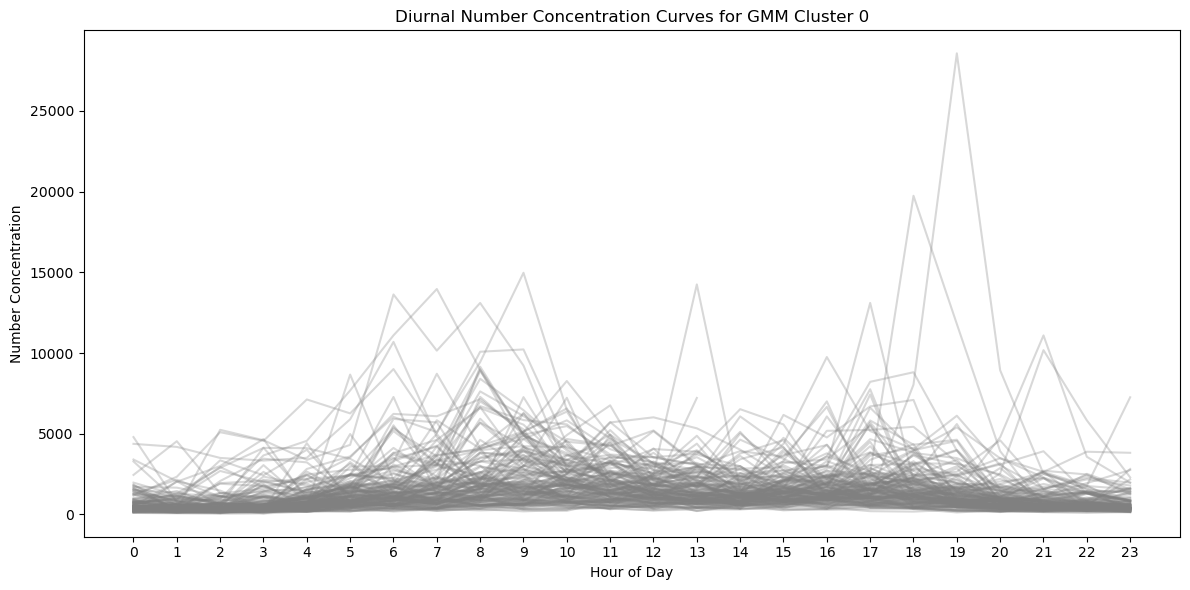

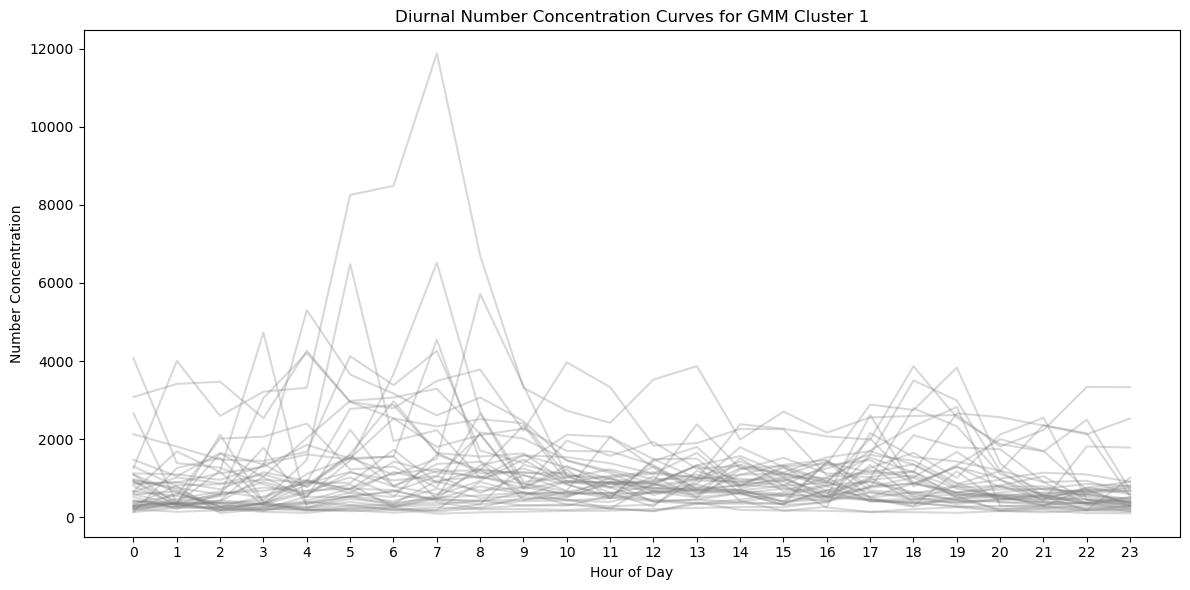

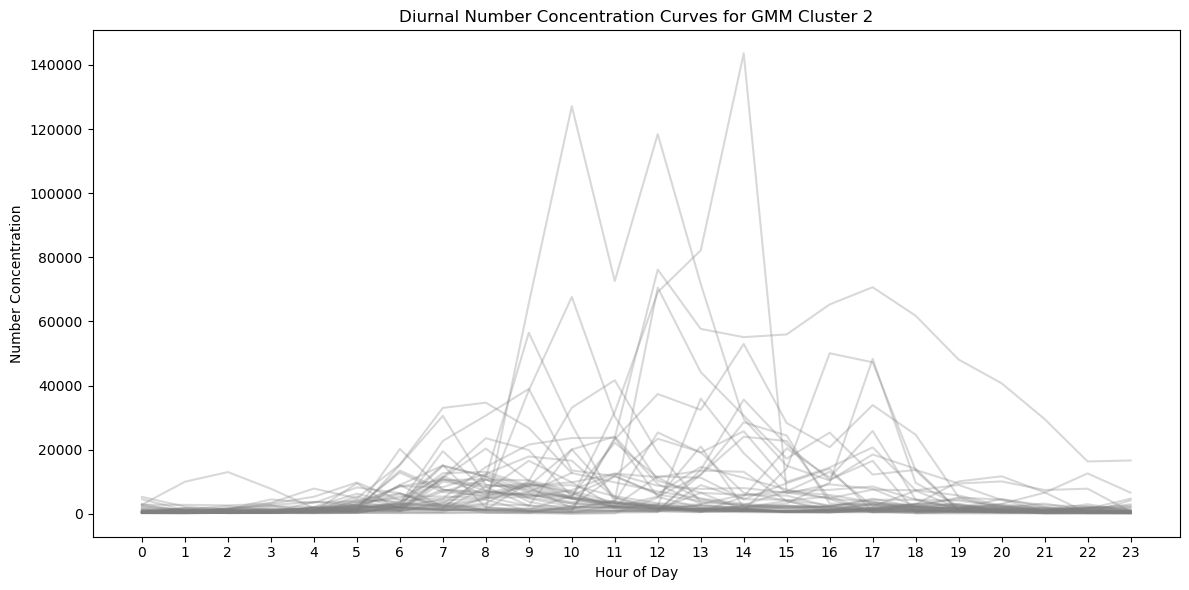

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ----------------------------------------------------------
# 1. Fit a GMM with 3 components on the log-transformed N_diff data.
#    Assume daily_results_df already has a column 'log_N_diff' and 'date'.
#    (Make sure that daily_results_df contains only days where N_diff > 0.)
# ----------------------------------------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
# Reshape the data to a 2D array as required by scikit-learn.
X = daily_results_df['log_N_diff'].values.reshape(-1, 1)
daily_results_df['gmm_label'] = gmm.fit_predict(X)

# Optional: Print the number of days in each cluster
print(daily_results_df['gmm_label'].value_counts())

# ----------------------------------------------------------
# 2. Ensure the hourly number concentration DataFrame has a date column.
#    We assume N_2_5_5 is your original DataFrame with hourly number concentrations.
# ----------------------------------------------------------

# ----------------------------------------------------------
# 3. For each GMM cluster, plot the diurnal number concentration curves.
#    Each curve represents one day.
# ----------------------------------------------------------
unique_labels = sorted(daily_results_df['gmm_label'].unique())

for label in unique_labels:
    # Get the list of dates for days belonging to the current GMM cluster.
    dates_in_cluster = daily_results_df[daily_results_df['gmm_label'] == label]['date'].unique()
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Diurnal Number Concentration Curves for GMM Cluster {label}')
    
    # For each day, extract the hourly data and plot the curve.
    for d in dates_in_cluster:
        day_data = N_2_5_5[N_2_5_5['date'] == d]
        if day_data.empty:
            continue
        # Extract hour of day and concentration.
        # (Assuming N_2_5_5 has a 'concentration' column.)
        hours = day_data.index.hour
        concentration = day_data['concentration']
        plt.plot(hours, concentration, color='gray', alpha=0.3)  # Plot with transparency
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Number Concentration')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


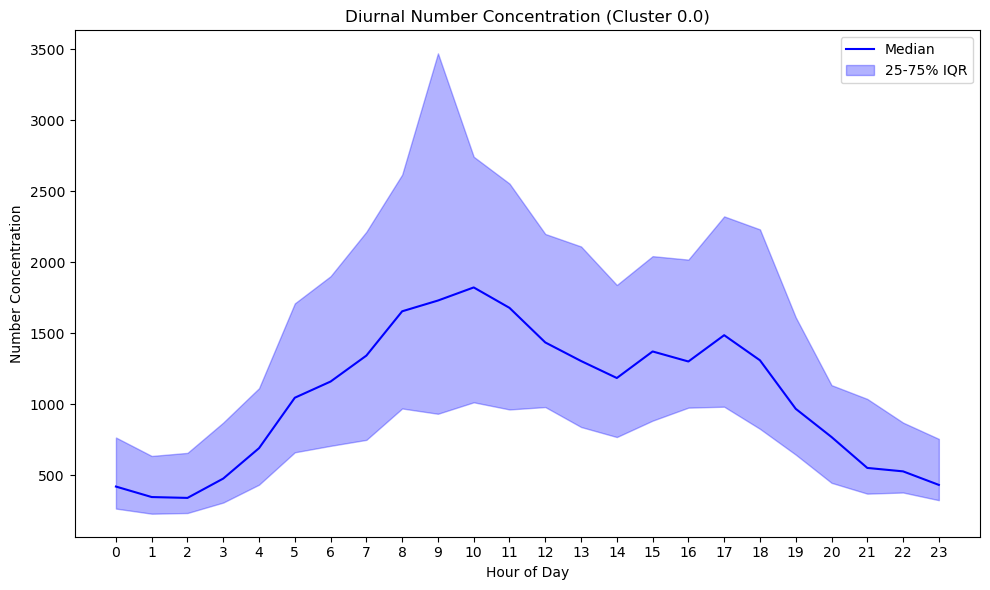

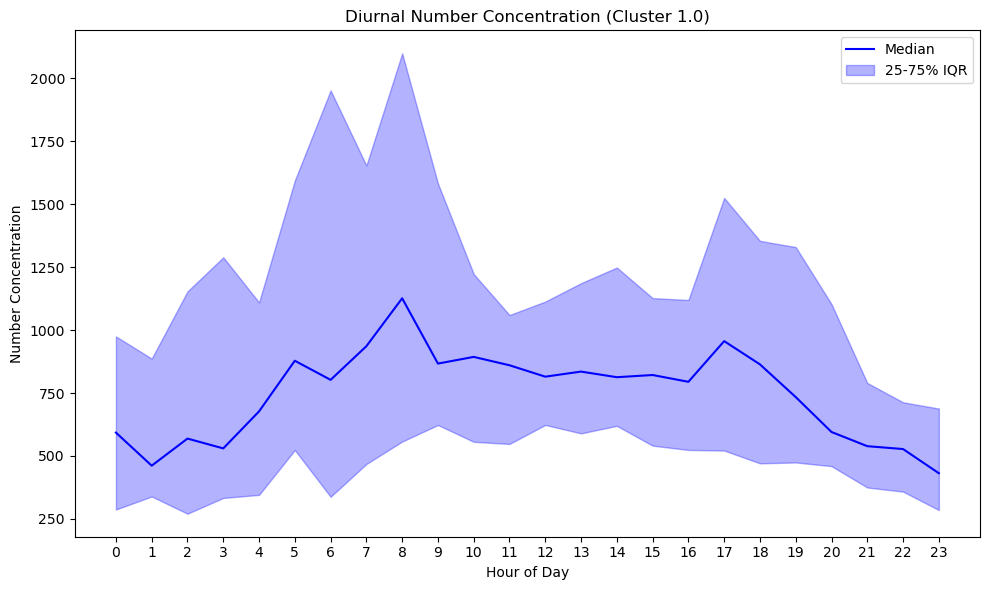

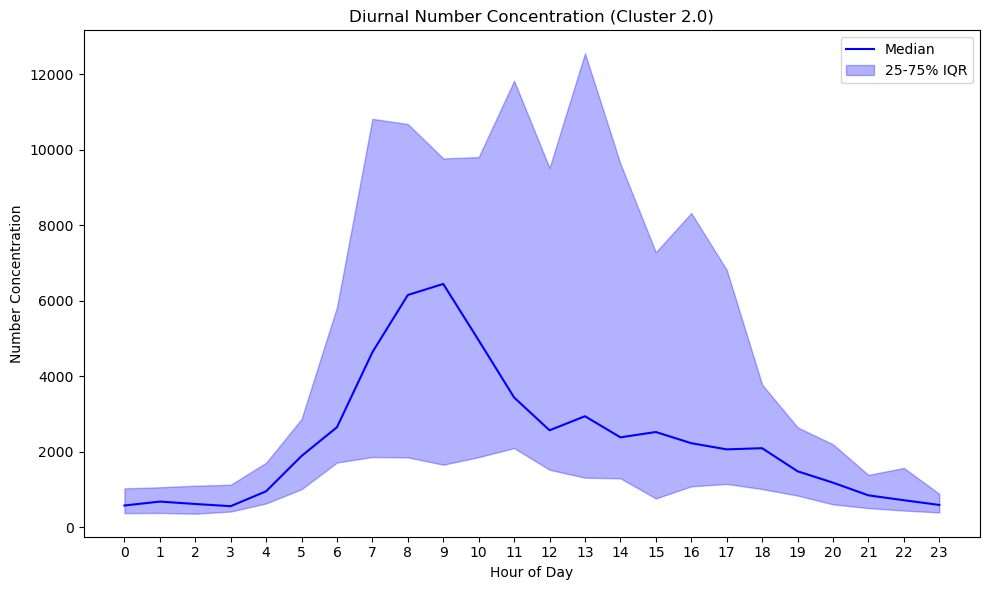

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Merge Hourly Data with Daily Cluster Labels ---
# Ensure that N_2_5_5 has a 'date' column (extracted from the datetime index)

# Merge the daily cluster labels (gmm_label) from daily_results_df into the hourly N_2_5_5
# (We assume daily_results_df contains at least the columns 'date' and 'gmm_label'.)
df_merged = N_2_5_5.merge(daily_results_df[['date', 'gmm_label']], on='date', how='left')

# --- 2. Group the Hourly Data by Cluster and Hour ---
# We want the median, 25th, and 75th percentiles for the 'concentration' at each hour.
grouped = df_merged.groupby(['gmm_label', 'hour'])['concentration'].agg(
    median='median',
    lower=lambda x: x.quantile(0.25),
    upper=lambda x: x.quantile(0.75)
).reset_index()

# --- 3. Plot the Clean Diurnal Curves for Each Cluster ---
unique_clusters = sorted(grouped['gmm_label'].unique())

for label in unique_clusters:
    cluster_data = grouped[grouped['gmm_label'] == label]
    
    plt.figure(figsize=(10, 6))
    # Plot the median line
    plt.plot(cluster_data['hour'], cluster_data['median'], label='Median', color='blue')
    # Shade the interquartile range (25th to 75th percentile)
    plt.fill_between(cluster_data['hour'],
                     cluster_data['lower'],
                     cluster_data['upper'],
                     color='blue', alpha=0.3, label='25-75% IQR')
    
    plt.title(f'Diurnal Number Concentration (Cluster {label})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number Concentration')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.tight_layout()
    plt.show()


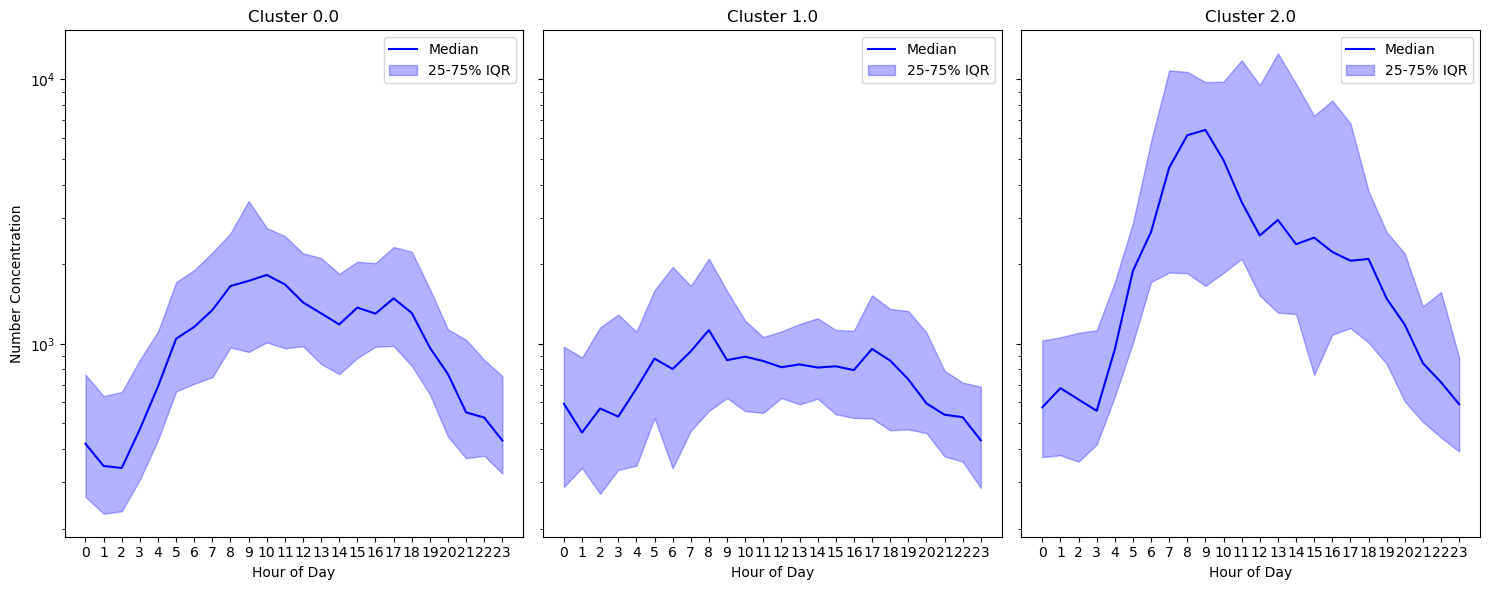

In [65]:
import matplotlib.pyplot as plt

# Determine the unique clusters (assumed to be 3)
unique_clusters = sorted(grouped['gmm_label'].unique())
n_clusters = len(unique_clusters)

# Create a single figure with horizontal subplots (1 row, n_clusters columns)
fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters*5, 6), sharey=True)

# Loop over clusters and plot on the corresponding subplot.
for ax, label in zip(axes, unique_clusters):
    cluster_data = grouped[grouped['gmm_label'] == label]
    
    # Plot the median line
    ax.plot(cluster_data['hour'], cluster_data['median'], label='Median', color='blue')
    # Shade the interquartile range
    ax.fill_between(cluster_data['hour'],
                    cluster_data['lower'],
                    cluster_data['upper'],
                    color='blue', alpha=0.3, label='25-75% IQR')
    
    ax.set_title(f'Cluster {label}')
    ax.set_xlabel('Hour of Day')
    ax.set_xticks(range(0, 24))
    ax.set_yscale('log')  # Set log scale for y-axis
    ax.legend()

# Set a common y-label
axes[0].set_ylabel('Number Concentration')

plt.tight_layout()
plt.show()


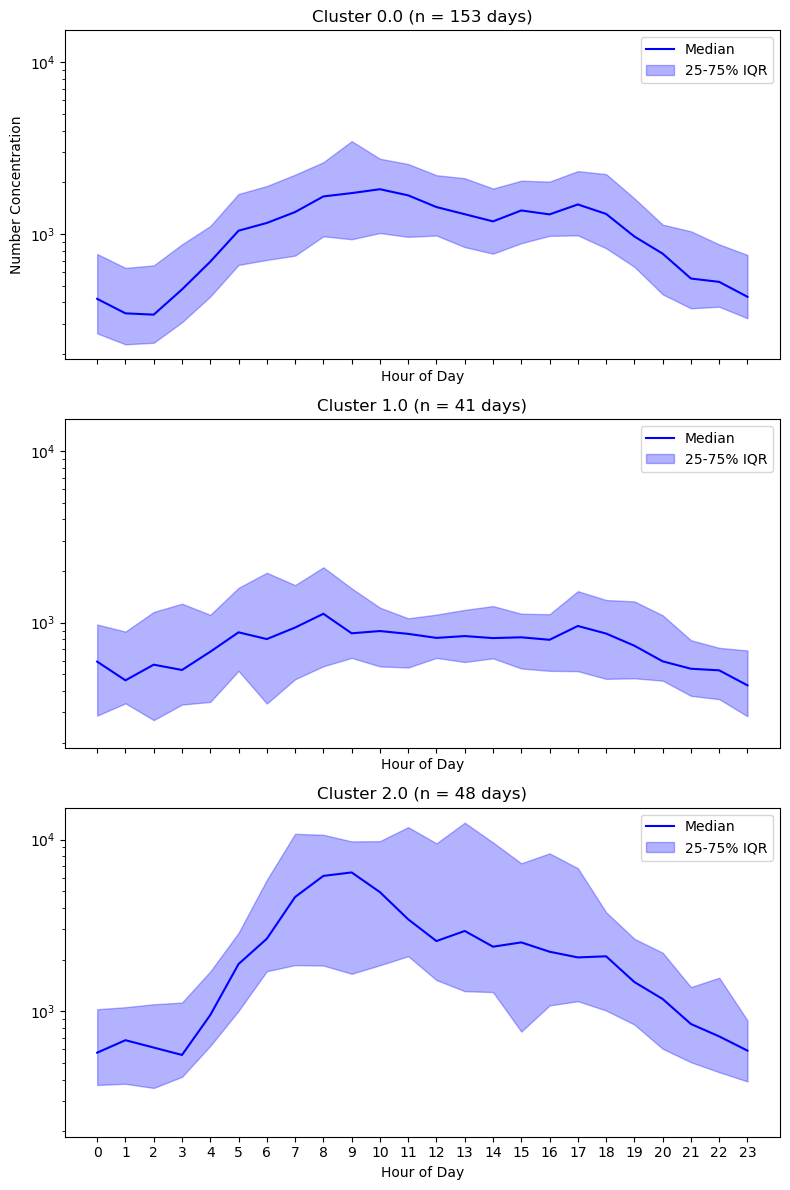

In [62]:
import matplotlib.pyplot as plt

# --- 1. Count the number of days for each cluster using daily_results_df ---
# Ensure that daily_results_df['date'] is of a datetime type or date type.
# Count unique days per cluster
counts = daily_results_df.groupby('gmm_label')['date'].nunique()

# --- 2. Get the unique clusters from the aggregated data ---
unique_clusters = sorted(grouped['gmm_label'].unique())
n_clusters = len(unique_clusters)

# --- 3. Create vertical subplots (one row per cluster) ---
fig, axes = plt.subplots(n_clusters, 1, figsize=(8, n_clusters * 4), sharex=True, sharey=True)

# If there's only one cluster, ensure axes is iterable.
if n_clusters == 1:
    axes = [axes]

for ax, label in zip(axes, unique_clusters):
    # Filter the aggregated data for the current cluster.
    cluster_data = grouped[grouped['gmm_label'] == label]
    # Get the number of days for this cluster from the daily_results_df.
    num_days = counts.loc[label]
    
    # Plot the median diurnal curve.
    ax.plot(cluster_data['hour'], cluster_data['median'], label='Median', color='blue')
    # Shade the interquartile range (25th to 75th percentile).
    ax.fill_between(cluster_data['hour'],
                    cluster_data['lower'],
                    cluster_data['upper'],
                    color='blue', alpha=0.3, label='25-75% IQR')
    
    # Set the title with the cluster label and number of days.
    ax.set_title(f'Cluster {label} (n = {num_days} days)')
    ax.set_xlabel('Hour of Day')
    ax.set_xticks(range(0, 24))
    ax.set_yscale('log')  # Set log scale for the y-axis
    ax.legend()

# Set a common y-label.
axes[0].set_ylabel('Number Concentration')

plt.tight_layout()
plt.show()


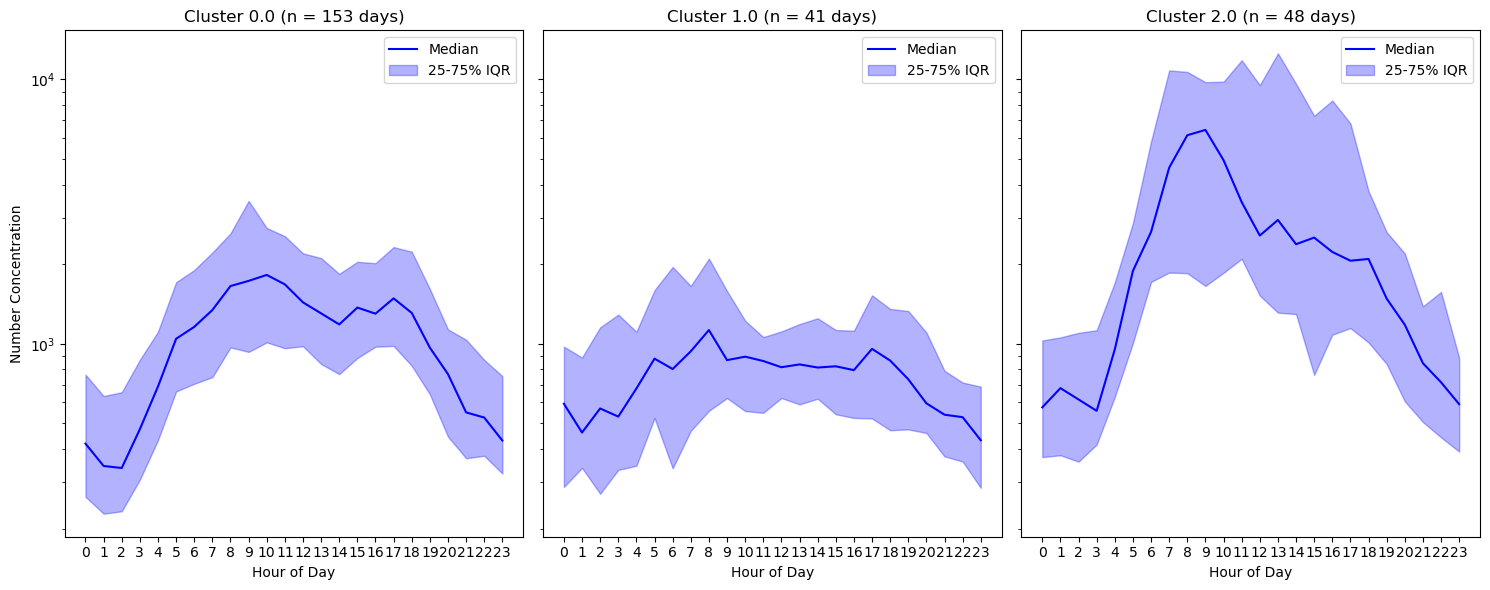

In [67]:
import matplotlib.pyplot as plt

# --- 1. Count the number of days for each cluster from daily_results_df ---
counts = daily_results_df.groupby('gmm_label')['date'].nunique()

# --- 2. Get the unique clusters from the aggregated data ---
unique_clusters = sorted(grouped['gmm_label'].unique())
n_clusters = len(unique_clusters)

# --- 3. Create horizontal subplots (one column per cluster) ---
fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters * 5, 6), sharey=True)

# If there's only one cluster, make sure axes is iterable.
if n_clusters == 1:
    axes = [axes]

# --- 4. Loop over clusters and plot each in its respective subplot ---
for ax, label in zip(axes, unique_clusters):
    # Filter aggregated data for the current cluster.
    cluster_data = grouped[grouped['gmm_label'] == label]
    # Retrieve the number of days for this cluster.
    num_days = counts.loc[label]
    
    # Plot the median curve.
    ax.plot(cluster_data['hour'], cluster_data['median'], label='Median', color='blue')
    # Shade the interquartile range (25th to 75th percentile).
    ax.fill_between(cluster_data['hour'],
                    cluster_data['lower'],
                    cluster_data['upper'],
                    color='blue', alpha=0.3, label='25-75% IQR')
    
    # Set subplot title including the cluster label and the number of days.
    ax.set_title(f'Cluster {label} (n = {num_days} days)')
    ax.set_xlabel('Hour of Day')
    ax.set_xticks(range(0, 24))
    ax.set_yscale('log')  # Set log scale for the y-axis
    ax.legend()

# Set a common y-label.
axes[0].set_ylabel('Number Concentration')

plt.tight_layout()
plt.show()
